In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Import libraries untuk EDA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df = pd.read_csv('data_capstone.csv')
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


In [19]:
df.isnull().sum()

customer_id          0
plan_type            0
device_brand         0
avg_data_usage_gb    0
pct_video_usage      0
avg_call_duration    0
sms_freq             0
monthly_spend        0
topup_freq           0
travel_score         0
complaint_count      0
target_offer         0
dtype: int64

# 📊 Exploratory Data Analysis (EDA)

## 1. Informasi Dasar Dataset

In [20]:
# Shape dan info dataset
print("="*60)
print("INFORMASI DATASET")
print("="*60)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom-kolom dalam dataset:")
print(df.columns.tolist())

INFORMASI DATASET
Jumlah baris: 10000
Jumlah kolom: 12

Kolom-kolom dalam dataset:
['customer_id', 'plan_type', 'device_brand', 'avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count', 'target_offer']


In [21]:
# Info detail dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [22]:
# Statistik deskriptif
df.describe()

,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.958883,0.402639,9.971357,15.010800,109776.500000,2.986600,0.282441,0.492600
std,4.192909,0.195741,4.954993,3.872775,46237.321903,1.709828,0.158366,0.704127
min,0.030000,0.000000,-8.370000,4.000000,-13000.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,39.020000,1.000000,27.770000,31.000000,450000.000000,12.000000,0.854814,5.000000


In [12]:
# Cek duplikasi data
print("="*60)
print("CEK DUPLIKASI DATA")
print("="*60)
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
print(f"Jumlah customer_id duplikat: {df['customer_id'].duplicated().sum()}")

CEK DUPLIKASI DATA
Jumlah data duplikat: 0
Jumlah customer_id duplikat: 0


## 2. Analisis Data Kategorikal

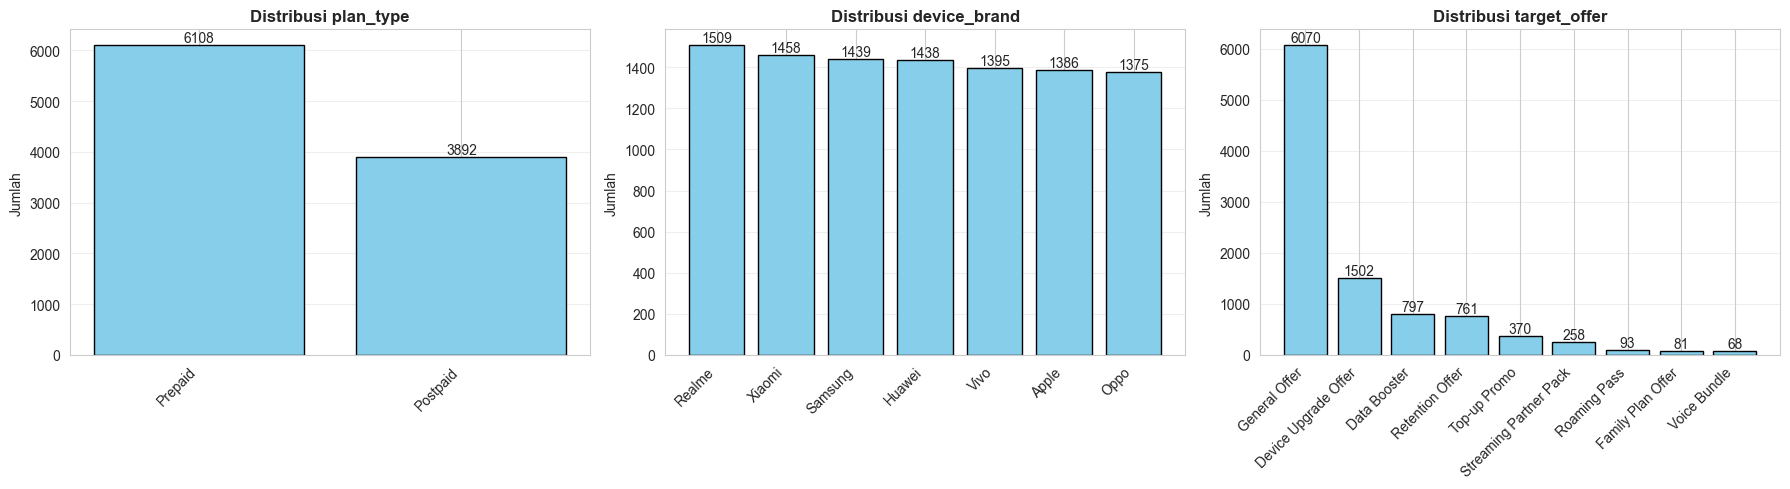

In [23]:
# Distribusi variabel kategorikal
categorical_cols = ['plan_type', 'device_brand', 'target_offer']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Jumlah')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Tambahkan nilai di atas bar
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [24]:
# Detail distribusi kategorikal
print("="*60)
print("DISTRIBUSI DATA KATEGORIKAL")
print("="*60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Persentase:")
    print(df[col].value_counts(normalize=True) * 100)

DISTRIBUSI DATA KATEGORIKAL

plan_type:
plan_type
Prepaid     6108
Postpaid    3892
Name: count, dtype: int64
Persentase:
plan_type
Prepaid     61.08
Postpaid    38.92
Name: proportion, dtype: float64

device_brand:
device_brand
Realme     1509
Xiaomi     1458
Samsung    1439
Huawei     1438
Vivo       1395
Apple      1386
Oppo       1375
Name: count, dtype: int64
Persentase:
device_brand
Realme     15.09
Xiaomi     14.58
Samsung    14.39
Huawei     14.38
Vivo       13.95
Apple      13.86
Oppo       13.75
Name: proportion, dtype: float64

target_offer:
target_offer
General Offer             6070
Device Upgrade Offer      1502
Data Booster               797
Retention Offer            761
Top-up Promo               370
Streaming Partner Pack     258
Roaming Pass                93
Family Plan Offer           81
Voice Bundle                68
Name: count, dtype: int64
Persentase:
target_offer
General Offer             60.70
Device Upgrade Offer      15.02
Data Booster               7.97
Re

In [1]:
# Cek kategori unik pada target_offer
print("="*60)
print("KATEGORI TARGET OFFER")
print("="*60)
print(f"\nJumlah kategori unik: {df['target_offer'].nunique()}")
print(f"\nKategori yang ada:")
print(df['target_offer'].unique())
print(f"\nDistribusi lengkap:")
print(df['target_offer'].value_counts().sort_index())

KATEGORI TARGET OFFER


NameError: name 'df' is not defined

## 3. Analisis Data Numerikal

In [25]:
# Identifikasi kolom numerikal
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Kolom Numerikal:")
print(numerical_cols)

Kolom Numerikal:
['avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count']


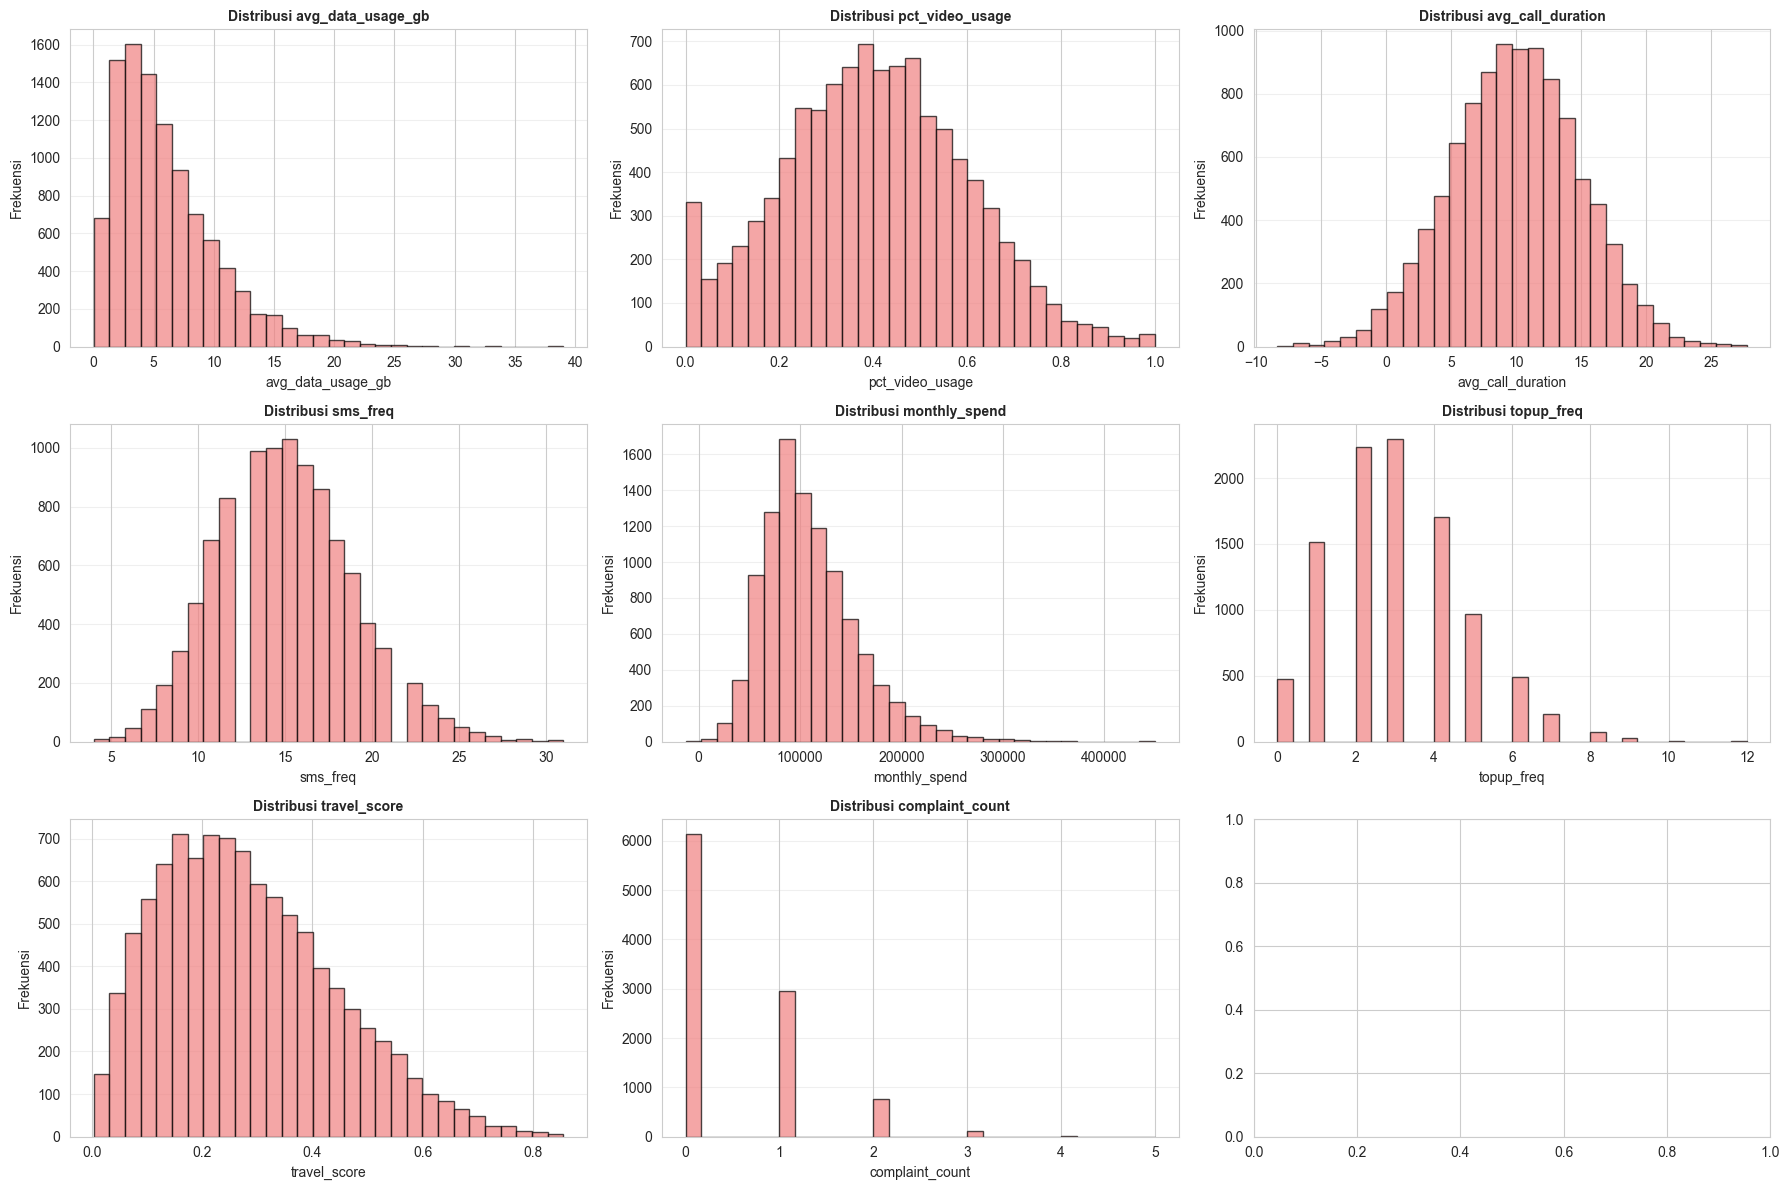

In [26]:
# Distribusi variabel numerikal dengan histogram
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    axes[idx].hist(df[col].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

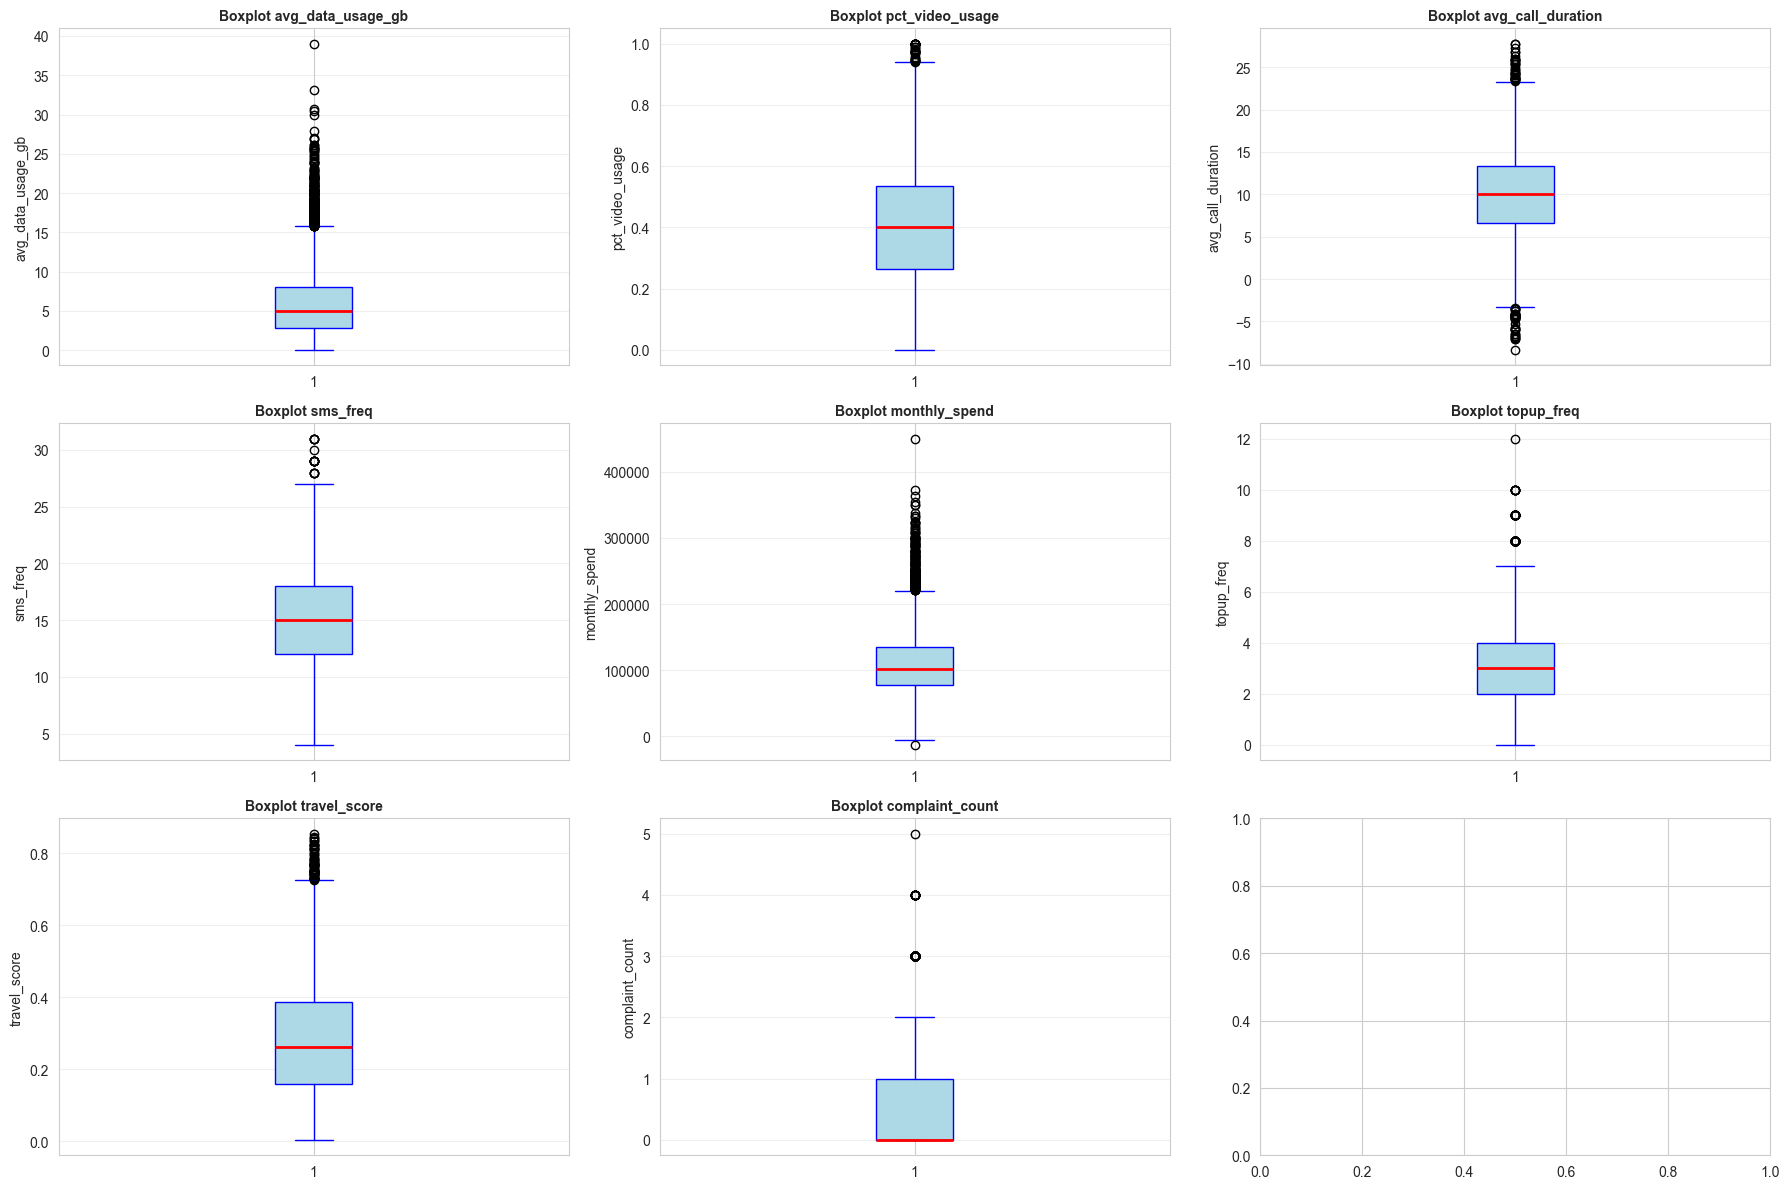

In [27]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'))
    axes[idx].set_title(f'Boxplot {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Analisis Korelasi

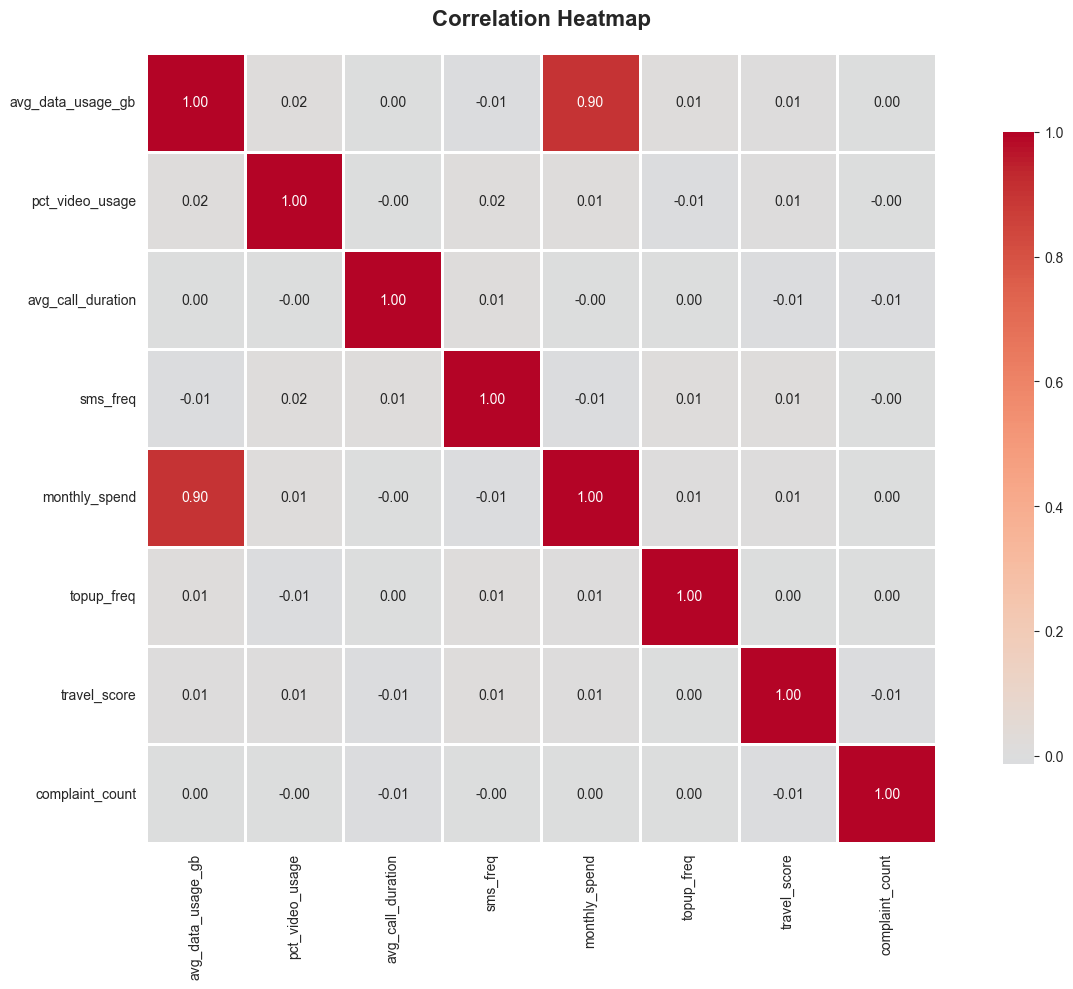

In [28]:
# Heatmap korelasi
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5. Analisis Berdasarkan Target Offer

In [29]:
# Rata-rata fitur numerikal per target offer
target_analysis = df.groupby('target_offer')[numerical_cols].mean()
print("="*80)
print("RATA-RATA FITUR PER TARGET OFFER")
print("="*80)
print(target_analysis)

RATA-RATA FITUR PER TARGET OFFER
                        avg_data_usage_gb  pct_video_usage  avg_call_duration  \
target_offer                                                                    
Data Booster                    11.637666         0.629362           9.905496   
Device Upgrade Offer             9.591738         0.353162           9.920679   
Family Plan Offer                6.740741         0.399032           9.116296   
General Offer                    4.782153         0.375200           9.883402   
Retention Offer                  4.102024         0.382692           9.931787   
Roaming Pass                     5.279247         0.401688           9.620645   
Streaming Partner Pack           6.202016         0.709801           9.556085   
Top-up Promo                     1.923027         0.398232          10.163216   
Voice Bundle                     6.013235         0.374868          22.186618   

                         sms_freq  monthly_spend  topup_freq  travel_score 

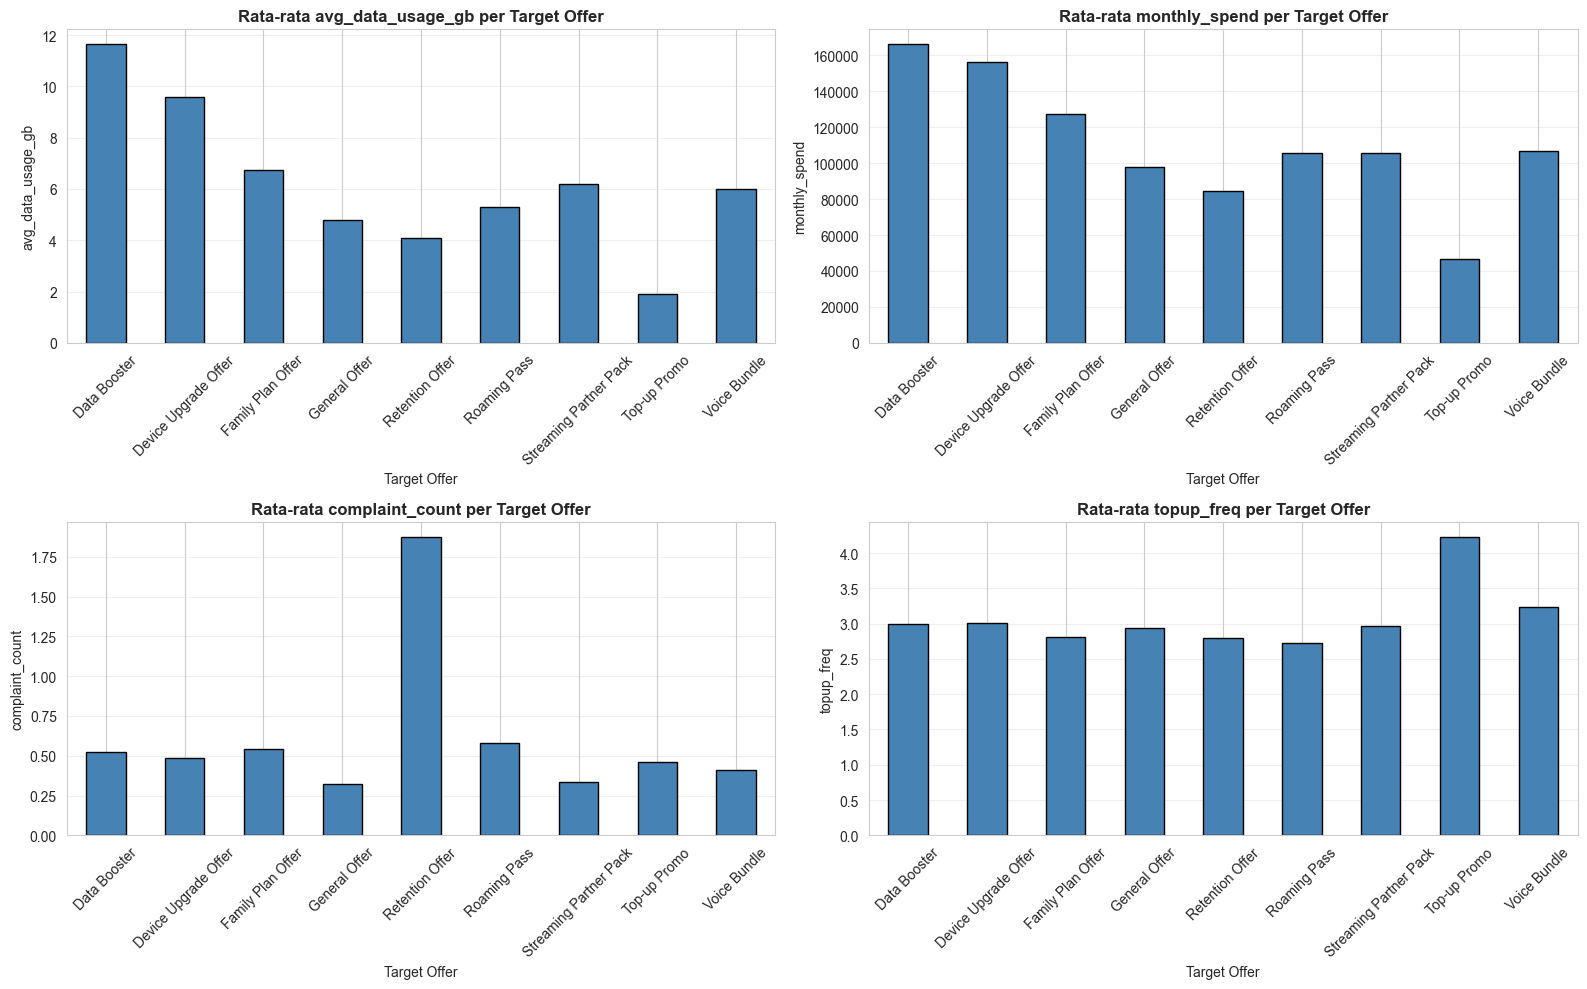

In [30]:
# Visualisasi perbandingan fitur penting per target offer
features_to_plot = ['avg_data_usage_gb', 'monthly_spend', 'complaint_count', 'topup_freq']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    df.groupby('target_offer')[feature].mean().plot(kind='bar', ax=axes[idx], 
                                                     color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Rata-rata {feature} per Target Offer', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target Offer')
    axes[idx].set_ylabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Analisis Outlier Detail

In [31]:
# Deteksi outlier dengan IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("="*80)
print("JUMLAH OUTLIER PER FITUR (IQR Method)")
print("="*80)
for col in numerical_cols:
    outlier_count = detect_outliers(df, col)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"{col:25s}: {outlier_count:5d} outliers ({outlier_percentage:.2f}%)")

JUMLAH OUTLIER PER FITUR (IQR Method)
avg_data_usage_gb        :   305 outliers (3.05%)
pct_video_usage          :    40 outliers (0.40%)
avg_call_duration        :    72 outliers (0.72%)
sms_freq                 :    17 outliers (0.17%)
monthly_spend            :   250 outliers (2.50%)
topup_freq               :   110 outliers (1.10%)
travel_score             :    70 outliers (0.70%)
complaint_count          :   138 outliers (1.38%)


## 7. Analisis Plan Type dan Device Brand

CROSSTAB: PLAN TYPE vs TARGET OFFER
target_offer  Data Booster  Device Upgrade Offer  Family Plan Offer  \
plan_type                                                             
Postpaid               312                   558                 81   
Prepaid                485                   944                  0   
All                    797                  1502                 81   

target_offer  General Offer  Retention Offer  Roaming Pass  \
plan_type                                                    
Postpaid               2396              339            36   
Prepaid                3674              422            57   
All                    6070              761            93   

target_offer  Streaming Partner Pack  Top-up Promo  Voice Bundle    All  
plan_type                                                                
Postpaid                         102             0            68   3892  
Prepaid                          156           370             0   6108  
A

<Figure size 1200x600 with 0 Axes>

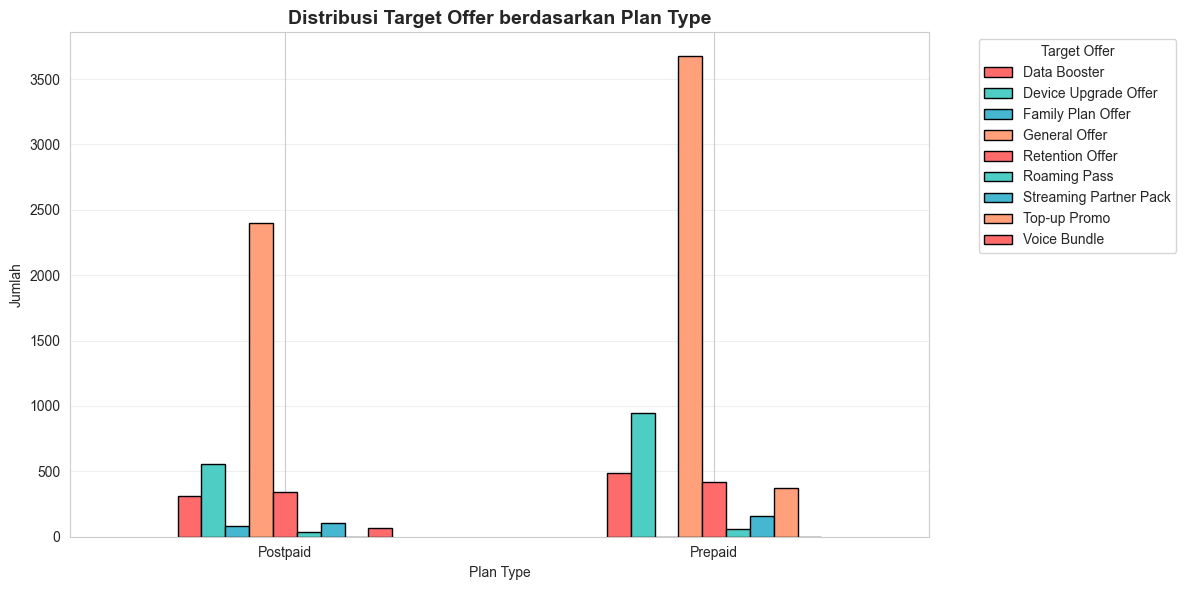

In [32]:
# Crosstab Plan Type vs Target Offer
print("="*80)
print("CROSSTAB: PLAN TYPE vs TARGET OFFER")
print("="*80)
crosstab_plan = pd.crosstab(df['plan_type'], df['target_offer'], margins=True)
print(crosstab_plan)

# Visualisasi
plt.figure(figsize=(12, 6))
pd.crosstab(df['plan_type'], df['target_offer']).plot(kind='bar', stacked=False, 
                                                        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
                                                        edgecolor='black')
plt.title('Distribusi Target Offer berdasarkan Plan Type', fontsize=14, fontweight='bold')
plt.xlabel('Plan Type')
plt.ylabel('Jumlah')
plt.legend(title='Target Offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


TOP 5 DEVICE BRAND
device_brand
Realme     1509
Xiaomi     1458
Samsung    1439
Huawei     1438
Vivo       1395
Apple      1386
Oppo       1375
Name: count, dtype: int64


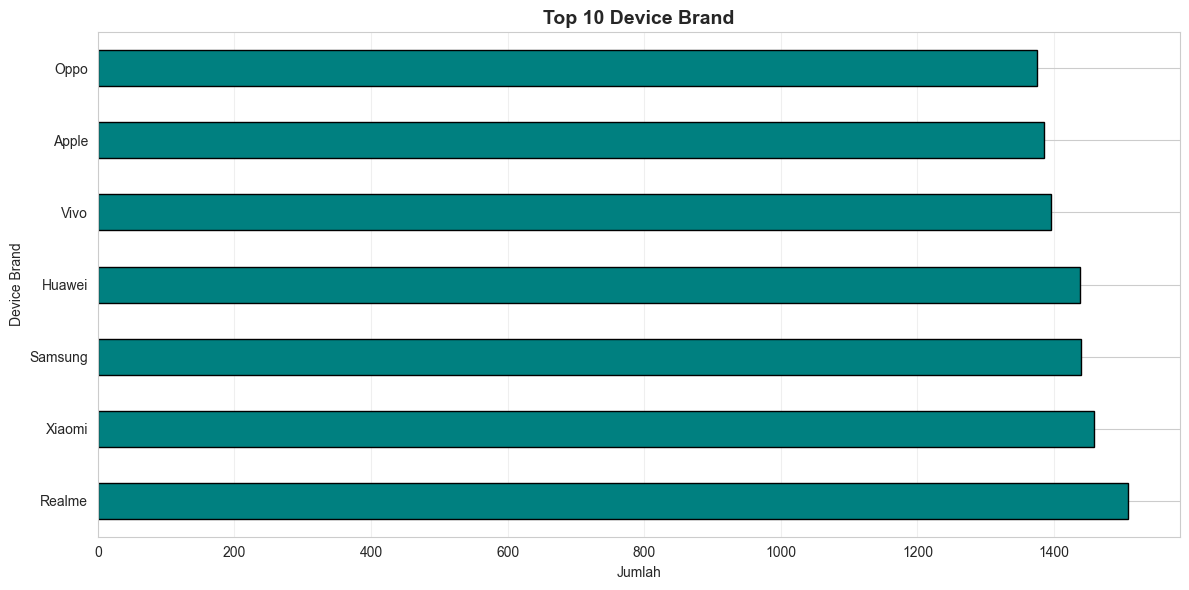

In [33]:
# Analisis Device Brand
print("\n" + "="*80)
print("TOP 5 DEVICE BRAND")
print("="*80)
top_brands = df['device_brand'].value_counts().head(10)
print(top_brands)

plt.figure(figsize=(12, 6))
top_brands.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Device Brand', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah')
plt.ylabel('Device Brand')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Ringkasan Insights EDA

In [34]:
# Ringkasan statistik lengkap
print("="*80)
print("RINGKASAN EDA - KEY FINDINGS")
print("="*80)

print("\n📊 DATASET INFO:")
print(f"  • Total Data: {len(df):,} baris")
print(f"  • Total Fitur: {len(df.columns)} kolom")
print(f"  • Missing Values: {df.isnull().sum().sum()} nilai")
print(f"  • Duplikasi: {df.duplicated().sum()} baris")

print("\n📱 DISTRIBUSI KATEGORIKAL:")
print(f"  • Plan Type: {df['plan_type'].value_counts().to_dict()}")
print(f"  • Jumlah Device Brand: {df['device_brand'].nunique()} brand")
print(f"  • Target Offer: {df['target_offer'].value_counts().to_dict()}")

print("\n💰 STATISTIK KUNCI:")
print(f"  • Rata-rata Monthly Spend: Rp {df['monthly_spend'].mean():,.0f}")
print(f"  • Rata-rata Data Usage: {df['avg_data_usage_gb'].mean():.2f} GB")
print(f"  • Rata-rata Complaint Count: {df['complaint_count'].mean():.2f}")

print("\n🎯 INSIGHTS TARGET OFFER:")
for offer in df['target_offer'].unique():
    count = len(df[df['target_offer'] == offer])
    percentage = (count / len(df)) * 100
    avg_spend = df[df['target_offer'] == offer]['monthly_spend'].mean()
    print(f"  • {offer}: {count:,} ({percentage:.1f}%) - Avg Spend: Rp {avg_spend:,.0f}")

print("\n" + "="*80)

RINGKASAN EDA - KEY FINDINGS

📊 DATASET INFO:
  • Total Data: 10,000 baris
  • Total Fitur: 12 kolom
  • Missing Values: 0 nilai
  • Duplikasi: 0 baris

📱 DISTRIBUSI KATEGORIKAL:
  • Plan Type: {'Prepaid': 6108, 'Postpaid': 3892}
  • Jumlah Device Brand: 7 brand
  • Target Offer: {'General Offer': 6070, 'Device Upgrade Offer': 1502, 'Data Booster': 797, 'Retention Offer': 761, 'Top-up Promo': 370, 'Streaming Partner Pack': 258, 'Roaming Pass': 93, 'Family Plan Offer': 81, 'Voice Bundle': 68}

💰 STATISTIK KUNCI:
  • Rata-rata Monthly Spend: Rp 109,776
  • Rata-rata Data Usage: 5.96 GB
  • Rata-rata Complaint Count: 0.49

🎯 INSIGHTS TARGET OFFER:
  • General Offer: 6,070 (60.7%) - Avg Spend: Rp 97,863
  • Top-up Promo: 370 (3.7%) - Avg Spend: Rp 46,597
  • Device Upgrade Offer: 1,502 (15.0%) - Avg Spend: Rp 156,549
  • Data Booster: 797 (8.0%) - Avg Spend: Rp 166,148
  • Retention Offer: 761 (7.6%) - Avg Spend: Rp 84,464
  • Streaming Partner Pack: 258 (2.6%) - Avg Spend: Rp 105,678
  • 

# 🤖 ROADMAP: Membangun Model Rekomendasi Produk Telco

---

## 📋 Berdasarkan hasil EDA, berikut adalah tahapan lengkap untuk membangun model rekomendasi produk telco:

### **FASE 1: Data Preparation & Feature Engineering** 🔧

#### 1.1 Data Cleaning
- ✅ Handle missing values (jika ada)
- ✅ Handle outliers (berdasarkan analisis IQR)
- ✅ Remove duplicates
- ✅ Handle negative values (avg_call_duration memiliki nilai negatif)

#### 1.2 Feature Engineering
- 🔹 **Binning/Categorization**: 
  - Data usage: Low/Medium/High users
  - Monthly spend: Budget/Standard/Premium tiers
  - Complaint behavior: No complaint vs Complaint users
  
- 🔹 **Interaction Features**:
  - Data per Rupiah = avg_data_usage_gb / monthly_spend
  - Engagement score = (avg_call_duration + sms_freq) / 2
  - Customer value = monthly_spend * (1 - complaint_count/10)
  
- 🔹 **Encoding Categorical**:
  - Label Encoding untuk target (target_offer)
  - One-Hot Encoding untuk plan_type
  - Target/Frequency Encoding untuk device_brand

#### 1.3 Feature Selection
- Correlation analysis untuk remove redundant features
- Feature importance dari Random Forest
- Domain knowledge (fitur yang relevan untuk telco)

---

### **FASE 2: Exploratory Feature Analysis** 📊

#### 2.1 Analisis Distribusi Target
- Check class imbalance pada target_offer
- Strategi handling imbalance (SMOTE, class weights, etc.)

#### 2.2 Feature vs Target Analysis
- Distribusi fitur per kategori target
- Statistical test (Chi-square, ANOVA)
- Identify key differentiators

---

### **FASE 3: Data Splitting & Preprocessing** ✂️

#### 3.1 Train-Test Split
- Split data: 80% training, 20% testing
- Stratified split (mempertahankan proporsi target_offer)

#### 3.2 Feature Scaling
- StandardScaler atau MinMaxScaler untuk fitur numerik
- Penting untuk algoritma berbasis distance (KNN, SVM, Neural Network)

---

### **FASE 4: Model Development** 🎯

#### 4.1 Baseline Model
- **Logistic Regression** (multiclass)
- Simple, interpretable, fast baseline

#### 4.2 Tree-based Models
- **Decision Tree**: Interpretable, identify decision rules
- **Random Forest**: Ensemble, feature importance
- **XGBoost/LightGBM**: High performance, handle imbalance

#### 4.3 Other Algorithms
- **K-Nearest Neighbors (KNN)**: Similar customer behavior
- **Naive Bayes**: Probabilistic approach
- **Neural Network**: Complex patterns (jika data cukup besar)

---

### **FASE 5: Model Evaluation** 📈

#### 5.1 Metrics Selection
**Untuk Multi-class Classification:**
- ✅ **Accuracy**: Overall performance
- ✅ **Precision**: Berapa banyak prediksi benar per kelas
- ✅ **Recall**: Berapa banyak actual yang berhasil diprediksi
- ✅ **F1-Score**: Harmonic mean precision & recall
- ✅ **Confusion Matrix**: Detail per class
- ✅ **Classification Report**: Comprehensive metrics

#### 5.2 Cross-Validation
- K-Fold CV (k=5 atau k=10)
- Stratified K-Fold untuk handle imbalance
- Validate model stability

---

### **FASE 6: Hyperparameter Tuning** ⚙️

#### 6.1 Optimization Methods
- **Grid Search CV**: Exhaustive search
- **Random Search CV**: Random sampling
- **Bayesian Optimization**: Smart search (Optuna, Hyperopt)

#### 6.2 Parameters to Tune
- Random Forest: n_estimators, max_depth, min_samples_split
- XGBoost: learning_rate, max_depth, n_estimators, subsample
- Neural Network: layers, neurons, activation, dropout

---

### **FASE 7: Model Interpretation** 🔍

#### 7.1 Feature Importance
- Tree-based: built-in feature_importances_
- SHAP values: Explain individual predictions
- Permutation importance

#### 7.2 Business Insights
- Apa fitur yang paling mempengaruhi rekomendasi?
- Pola customer behavior untuk setiap offer
- Actionable insights untuk marketing

---

### **FASE 8: Model Deployment Strategy** 🚀

#### 8.1 Model Serialization
- Save best model (pickle, joblib, ONNX)
- Save preprocessing pipeline
- Version control

#### 8.2 API Development
- Flask/FastAPI untuk serving model
- Input validation
- Output formatting

#### 8.3 Monitoring & Maintenance
- Track prediction performance
- Retrain strategy (monthly, quarterly)
- A/B testing for new models

---

### **FASE 9: Business Implementation** 💼

#### 9.1 Recommendation System
- Real-time prediction untuk new customers
- Batch prediction untuk existing customers
- Personalized offers

#### 9.2 Success Metrics
- Conversion rate improvement
- Revenue uplift
- Customer satisfaction
- Churn reduction

---

## 🎯 **NEXT STEPS UNTUK PROJECT INI:**

### **Prioritas Tinggi:**
1. ✅ **Data Cleaning**: Handle nilai negatif, outliers
2. ✅ **Feature Engineering**: Create new meaningful features
3. ✅ **Handle Imbalance**: Check dan handle class imbalance
4. ✅ **Baseline Model**: Start dengan Logistic Regression
5. ✅ **Model Comparison**: Test multiple algorithms

### **Prioritas Sedang:**
6. ✅ **Hyperparameter Tuning**: Optimize best model
7. ✅ **Feature Selection**: Remove redundant features
8. ✅ **Cross-Validation**: Ensure model stability

### **Prioritas Rendah:**
9. ✅ **Advanced Models**: Neural Networks, Ensemble
10. ✅ **Deployment Prep**: API development, monitoring

---

## 📊 **KEY CONSIDERATIONS dari EDA:**

### **Berdasarkan analisis EDA, perhatikan:**

1. **Target Distribution**: 
   - Apakah target_offer balanced?
   - Need stratified split & sampling strategy

2. **Feature Correlations**:
   - avg_data_usage_gb & monthly_spend likely correlated
   - May need feature selection

3. **Outliers**:
   - Banyak outliers di beberapa fitur
   - Decision: Remove, cap, atau keep (tree-based robust to outliers)

4. **Categorical Features**:
   - device_brand has many categories → consider grouping or encoding
   - plan_type: simple binary → one-hot encoding

5. **Missing Values**:
   - Check if monthly_spend has nulls
   - Strategy: imputation or removal

---

## 🔄 **ITERATIVE PROCESS:**

```
EDA → Feature Engineering → Modeling → Evaluation → Tuning
 ↑                                                      ↓
 └──────────────────── Iterate ────────────────────────┘
```

**Model development adalah proses iteratif!** Setelah evaluasi model, kembali ke feature engineering atau data preparation jika perlu.

# 🚀 IMPLEMENTASI: Quick Start untuk Model Development

## STEP 1: Data Cleaning & Preparation

In [ ]:
# 1. Check untuk masalah data yang perlu dibersihkan
print("="*80)
print("DATA QUALITY CHECK")
print("="*80)

# Check nilai negatif di avg_call_duration
negative_calls = df[df['avg_call_duration'] < 0]
print(f"\n❌ Nilai negatif di avg_call_duration: {len(negative_calls)} baris")

# Check missing values
print(f"\n🔍 Missing values per kolom:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Check outliers summary
print(f"\n📊 Outliers Summary (IQR method):")
for col in numerical_cols[:5]:  # Show first 5
    outlier_count = detect_outliers(df, col)
    print(f"  {col}: {outlier_count} outliers")

# Data types check
print(f"\n📝 Data Types:")
print(df.dtypes)

In [ ]:
# 2. Create cleaned copy of dataframe
df_clean = df.copy()

# Handle negative values di avg_call_duration (set to 0 or mean)
df_clean.loc[df_clean['avg_call_duration'] < 0, 'avg_call_duration'] = 0

# Handle missing values di monthly_spend jika ada (fill dengan median)
if df_clean['monthly_spend'].isnull().sum() > 0:
    df_clean['monthly_spend'].fillna(df_clean['monthly_spend'].median(), inplace=True)

print("✅ Data cleaning completed!")
print(f"Shape sebelum: {df.shape}")
print(f"Shape sesudah: {df_clean.shape}")

## STEP 2: Feature Engineering

In [ ]:
# Create new features berdasarkan domain knowledge
df_engineered = df_clean.copy()

# 1. Data Efficiency Score: Berapa GB data per Rp 1000
df_engineered['data_per_1k_spend'] = (df_engineered['avg_data_usage_gb'] / df_engineered['monthly_spend']) * 1000

# 2. Communication Activity Score: kombinasi call & sms
df_engineered['comm_activity_score'] = df_engineered['avg_call_duration'] + (df_engineered['sms_freq'] * 0.5)

# 3. Customer Value Score: spending dikurangi dampak complaint
df_engineered['customer_value_score'] = df_engineered['monthly_spend'] * (1 - df_engineered['complaint_count'] * 0.1)

# 4. Video Content Preference: high vs low video users
df_engineered['is_heavy_video_user'] = (df_engineered['pct_video_usage'] > 0.5).astype(int)

# 5. Topup Frequency Category
df_engineered['topup_category'] = pd.cut(df_engineered['topup_freq'], 
                                          bins=[0, 2, 4, 10], 
                                          labels=['Low', 'Medium', 'High'])

# 6. Data Usage Category
df_engineered['data_usage_category'] = pd.cut(df_engineered['avg_data_usage_gb'],
                                               bins=[0, 3, 8, 20],
                                               labels=['Light', 'Medium', 'Heavy'])

# 7. Spend Category
df_engineered['spend_category'] = pd.cut(df_engineered['monthly_spend'],
                                          bins=[0, 75000, 120000, 300000],
                                          labels=['Budget', 'Standard', 'Premium'])

print("✅ Feature Engineering completed!")
print(f"\nNew Features Created:")
new_features = ['data_per_1k_spend', 'comm_activity_score', 'customer_value_score', 
                'is_heavy_video_user', 'topup_category', 'data_usage_category', 'spend_category']
for feat in new_features:
    print(f"  • {feat}")

print(f"\nTotal features sekarang: {len(df_engineered.columns)}")

## STEP 3: Analisis Target Balance

In [ ]:
# Check class balance untuk target variable
print("="*80)
print("TARGET VARIABLE ANALYSIS")
print("="*80)

target_dist = df_engineered['target_offer'].value_counts()
target_pct = df_engineered['target_offer'].value_counts(normalize=True) * 100

print("\nDistribusi Target Offer:")
for offer, count in target_dist.items():
    pct = target_pct[offer]
    print(f"  {offer:25s}: {count:5d} ({pct:5.2f}%)")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_dist.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Target Offer', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Target Offer')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporsi Target Offer', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Check if imbalanced
max_class = target_dist.max()
min_class = target_dist.min()
imbalance_ratio = max_class / min_class

print(f"\n⚠️ Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("   → Dataset IMBALANCED! Perlu strategi handling (SMOTE, class weights, etc.)")
else:
    print("   → Dataset cukup balanced")

## STEP 4: Prepare Data untuk Modeling

In [ ]:
# Import libraries untuk modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Drop kolom yang tidak diperlukan untuk modeling
columns_to_drop = ['customer_id']  # ID tidak informatif untuk prediksi
df_model = df_engineered.drop(columns=columns_to_drop)

# 2. Separate features and target
X = df_model.drop('target_offer', axis=1)
y = df_model['target_offer']

print("="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)
print(f"\nShape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")
print(f"\nTarget classes: {y.unique()}")
print(f"Number of classes: {y.nunique()}")

In [ ]:
# 3. Encode categorical features
# Label encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("\n" + "="*80)
print("ENCODING TARGET VARIABLE")
print("="*80)
print("\nTarget Mapping:")
for i, class_name in enumerate(le_target.classes_):
    print(f"  {class_name:25s} → {i}")

# Identify categorical and numerical columns in X
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 Feature Types:")
print(f"  Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"  Numerical features ({len(numerical_features)}): {len(numerical_features)} features")

In [ ]:
# 4. Encode categorical features dengan One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print("\n" + "="*80)
print("FEATURE ENCODING COMPLETED")
print("="*80)
print(f"\nShape sebelum encoding: {X.shape}")
print(f"Shape setelah encoding: {X_encoded.shape}")
print(f"\nJumlah features bertambah dari {X.shape[1]} menjadi {X_encoded.shape[1]}")
print(f"\nContoh features setelah encoding:")
print(X_encoded.columns.tolist()[:10])

In [ ]:
# 5. Split data: Train-Test (80-20) dengan stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded  # Mempertahankan proporsi target di train dan test
)

print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")

# Check proporsi target di train dan test
print(f"\n📊 Target Distribution in Train set:")
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
for idx, pct in train_dist.items():
    print(f"  Class {idx} ({le_target.classes_[idx]:25s}): {pct:.2f}%")

print(f"\n📊 Target Distribution in Test set:")
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100
for idx, pct in test_dist.items():
    print(f"  Class {idx} ({le_target.classes_[idx]:25s}): {pct:.2f}%")

In [ ]:
# 6. Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*80)
print("FEATURE SCALING COMPLETED")
print("="*80)
print(f"\n✅ StandardScaler fitted on training data")
print(f"✅ Applied to both train and test sets")
print(f"\nScaled data shape:")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  X_test_scaled:  {X_test_scaled.shape}")

print("\n" + "="*80)
print("🎯 DATA READY FOR MODELING!")
print("="*80)

## 📝 SUMMARY: Tahapan Selanjutnya

**Data sudah siap untuk modeling!** 🎉

### ✅ Yang sudah dilakukan:
1. ✅ Data Cleaning (handle negative values, missing values)
2. ✅ Feature Engineering (7 new features)
3. ✅ Target Analysis (check class balance)
4. ✅ Encoding (categorical → numerical)
5. ✅ Train-Test Split (80-20, stratified)
6. ✅ Feature Scaling (StandardScaler)

### 🚀 Next Steps - Modeling:

```python
# STEP 5: Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train baseline models dan compare performance
```

### 📊 Variables yang tersedia untuk modeling:

- **X_train_scaled** / **X_test_scaled**: Scaled features
- **y_train** / **y_test**: Encoded target (0, 1, 2, 3)
- **le_target**: Label encoder (untuk decode predictions)
- **scaler**: StandardScaler (untuk transform new data)

### 🎯 Recommended Models untuk Dicoba:

1. **Logistic Regression** (Baseline)
2. **Random Forest** (Feature importance)
3. **XGBoost/LightGBM** (High performance)
4. **K-Nearest Neighbors** (Similarity-based)

### 📈 Evaluation Metrics:

- Accuracy
- Precision, Recall, F1-Score (per class)
- Confusion Matrix
- Classification Report

---

**Ready to build the model!** 🚀

# 🎯 VARIABEL TARGET: `target_offer`

---

## ❓ Apa itu Variabel Target?

**Variabel target** adalah kolom yang ingin kita **prediksi** menggunakan model machine learning. Dalam kasus ini, variabel target adalah **`target_offer`**.

---

## 📊 Penjelasan `target_offer`

`target_offer` adalah **kategori produk/promo telco yang direkomendasikan** untuk setiap customer berdasarkan behavior mereka.

### **4 Kategori Target Offer:**

1. **General Offer** - Penawaran umum untuk customer biasa
2. **Data Booster** - Rekomendasi paket tambahan data untuk heavy data users
3. **Device Upgrade Offer** - Penawaran upgrade device untuk customer premium
4. **Top-up Promo** - Promo top-up untuk prepaid users yang sering isi ulang

---

## 🎯 Bagaimana Model Bekerja?

### **Input (Features/X):**
Customer behavior & demographics:
- `plan_type` - Jenis paket (Prepaid/Postpaid)
- `device_brand` - Merk device yang digunakan
- `avg_data_usage_gb` - Rata-rata penggunaan data per bulan
- `pct_video_usage` - Persentase penggunaan untuk video
- `avg_call_duration` - Rata-rata durasi telepon
- `sms_freq` - Frekuensi SMS
- `monthly_spend` - Pengeluaran bulanan
- `topup_freq` - Frekuensi top-up (untuk prepaid)
- `travel_score` - Skor mobilitas/perjalanan
- `complaint_count` - Jumlah komplain

### **Output (Target/y):**
Rekomendasi produk:
- **`target_offer`** → Kategori produk yang paling sesuai untuk customer

---

## 💡 Contoh Prediksi:

**Customer A:**
- Data usage tinggi (15 GB/bulan)
- Monthly spend tinggi (Rp 180,000)
- Video usage tinggi (60%)
- Complaint count rendah (0)

**→ Model Prediksi: `Data Booster`** ✅

---

**Customer B:**
- Data usage rendah (2 GB/bulan)
- Monthly spend rendah (Rp 60,000)
- Prepaid user
- Topup frequency tinggi (7x/bulan)

**→ Model Prediksi: `Top-up Promo`** ✅

---

## 🔄 Alur Kerja Model:

```
Input Features (Customer Behavior)
          ↓
    Machine Learning Model
          ↓
Output Prediction (target_offer)
          ↓
Rekomendasi Produk ke Customer
```

---

## 📈 Business Value:

Dengan memprediksi `target_offer` yang tepat berdasarkan customer behavior:

✅ **Personalisasi** - Setiap customer dapat rekomendasi yang sesuai  
✅ **Conversion Rate** - Meningkatkan kemungkinan customer menerima offer  
✅ **Revenue** - Meningkatkan pendapatan dari targeted marketing  
✅ **Customer Satisfaction** - Customer mendapat penawaran yang relevan  
✅ **Efisiensi Marketing** - Tidak perlu blast promo ke semua customer  

---

## 🎯 Tipe Problem: **Multi-class Classification**

Karena `target_offer` memiliki **4 kategori**, ini adalah masalah **klasifikasi multi-kelas**.

**Bukan:**
- ❌ Binary Classification (hanya 2 kelas)
- ❌ Regression (prediksi nilai numerik kontinu)

**Tapi:**
- ✅ **Multi-class Classification** (4 kategori: General Offer, Data Booster, Device Upgrade, Top-up Promo)

## 🔍 Analisis Detail Target Variable

In [ ]:
# Analisis mendalam target variable: target_offer
print("="*80)
print("ANALISIS TARGET VARIABLE: target_offer")
print("="*80)

print("\n📊 DISTRIBUSI TARGET OFFER:")
print(df['target_offer'].value_counts())
print("\n📈 PERSENTASE:")
print(df['target_offer'].value_counts(normalize=True) * 100)

print("\n" + "="*80)
print("KARAKTERISTIK CUSTOMER PER TARGET OFFER")
print("="*80)

# Analisis karakteristik setiap kategori target
for offer in df['target_offer'].unique():
    print(f"\n🎯 {offer}:")
    offer_data = df[df['target_offer'] == offer]
    
    print(f"   • Jumlah customer: {len(offer_data):,}")
    print(f"   • Rata-rata data usage: {offer_data['avg_data_usage_gb'].mean():.2f} GB")
    print(f"   • Rata-rata monthly spend: Rp {offer_data['monthly_spend'].mean():,.0f}")
    print(f"   • Rata-rata video usage: {offer_data['pct_video_usage'].mean():.2%}")
    print(f"   • Rata-rata complaint: {offer_data['complaint_count'].mean():.2f}")
    print(f"   • Top plan type: {offer_data['plan_type'].mode()[0]}")
    print(f"   • Rata-rata topup freq: {offer_data['topup_freq'].mean():.1f}x")

In [ ]:
# Visualisasi karakteristik per target offer
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Data Usage per Target
df.groupby('target_offer')['avg_data_usage_gb'].mean().sort_values().plot(
    kind='barh', ax=axes[0, 0], color='steelblue', edgecolor='black'
)
axes[0, 0].set_title('Rata-rata Data Usage per Target Offer', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Avg Data Usage (GB)')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Monthly Spend per Target
df.groupby('target_offer')['monthly_spend'].mean().sort_values().plot(
    kind='barh', ax=axes[0, 1], color='coral', edgecolor='black'
)
axes[0, 1].set_title('Rata-rata Monthly Spend per Target Offer', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Monthly Spend (Rp)')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Video Usage per Target
df.groupby('target_offer')['pct_video_usage'].mean().sort_values().plot(
    kind='barh', ax=axes[1, 0], color='lightgreen', edgecolor='black'
)
axes[1, 0].set_title('Rata-rata % Video Usage per Target Offer', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Video Usage (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Complaint Count per Target
df.groupby('target_offer')['complaint_count'].mean().sort_values().plot(
    kind='barh', ax=axes[1, 1], color='salmon', edgecolor='black'
)
axes[1, 1].set_title('Rata-rata Complaint Count per Target Offer', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Complaint Count')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Pola yang berbeda antar target offer menunjukkan model bisa belajar membedakan mereka!")

## 🎓 Kesimpulan: Variabel Target untuk Model

### **Variabel Target: `target_offer`**

#### ✅ **Kenapa `target_offer` sebagai target?**

1. **Merepresentasikan Rekomendasi Produk**
   - Setiap nilai adalah kategori produk/promo telco yang berbeda
   - Ini adalah goal dari model: memberikan rekomendasi produk yang tepat

2. **Berdasarkan Customer Behavior**
   - Customer dengan behavior berbeda → Offer berbeda
   - Model belajar pola: "Customer dengan karakteristik X cocok dengan Offer Y"

3. **Actionable untuk Business**
   - Hasil prediksi langsung bisa digunakan untuk marketing
   - Tim sales bisa langsung tawarkan produk yang diprediksi

---

### **📊 Rumus Model:**

```
f(customer_behavior) = target_offer

Dimana:
- customer_behavior = [data_usage, monthly_spend, plan_type, ...]
- target_offer = {General Offer, Data Booster, Device Upgrade, Top-up Promo}
```

---

### **🎯 Goal Model:**

**Memprediksi kategori `target_offer` yang paling sesuai untuk customer baru berdasarkan behavior mereka**

#### Contoh Use Case:
```
Customer baru dengan:
- Data usage: 12 GB/bulan
- Monthly spend: Rp 170,000
- Video usage: 55%
- Complaint: 0

Model Prediksi → "Data Booster" ✅

Marketing team → Tawarkan paket Data Booster ke customer ini
```

---

### **📌 Key Points:**

- ✅ **Target**: `target_offer` (4 kategori produk)
- ✅ **Features**: Semua kolom lain (customer behavior & demographics)
- ✅ **Problem Type**: Multi-class Classification
- ✅ **Output**: Prediksi kategori produk yang paling sesuai
- ✅ **Business Goal**: Personalized product recommendation

---

**Dengan model ini, perusahaan telco bisa memberikan rekomendasi produk yang tepat ke customer yang tepat!** 🚀

# 🌐 SISTEMATIKA WEB APP: Integrasi Model ML dengan Sistem Telco

---

## 📋 OVERVIEW: Alur Kerja Web Application

```
┌─────────────────────────────────────────────────────────────────┐
│                    TELCO SYSTEM ECOSYSTEM                        │
└─────────────────────────────────────────────────────────────────┘

1. Customer Usage        2. Data Collection      3. ML Processing
   ↓                        ↓                       ↓
[Customer]  →  [Telco System]  →  [Database]  →  [ML Model]
   ↓                        ↓                       ↓
Phone calls          CDR (Call Detail     Predict offer
Data usage           Record)               ↓
SMS                  Billing System     [Web App]
Top-up                                     ↓
                                      [Marketing Team]
```

---

## 🏗️ ARSITEKTUR WEB APP

### **3 Komponen Utama:**

```
┌──────────────────┐
│   FRONTEND       │  → User Interface (React/Vue/Angular)
├──────────────────┤
│   BACKEND        │  → API & Business Logic (Flask/Django/FastAPI)
├──────────────────┤
│   ML MODEL       │  → Prediction Engine (Trained Model)
└──────────────────┘
        ↕
┌──────────────────┐
│   DATABASE       │  → Customer Data Storage (PostgreSQL/MongoDB)
└──────────────────┘
```

---

## 📊 CARA MENDAPATKAN DATA BEHAVIOR PELANGGAN

### **Metode 1: OTOMATIS dari Sistem Telco (Recommended)**

#### 🔄 **Integrasi dengan Sistem Existing:**

**A. Sistem Billing Telco**
```
Billing System → API Integration → Web App Database

Data yang didapat:
✅ monthly_spend (dari invoice bulanan)
✅ topup_freq (dari history top-up)
✅ plan_type (dari kontrak customer)
```

**B. Network Monitoring System**
```
Network System → Data Pipeline → Web App Database

Data yang didapat:
✅ avg_data_usage_gb (dari network usage logs)
✅ pct_video_usage (dari DPI - Deep Packet Inspection)
✅ avg_call_duration (dari CDR - Call Detail Records)
✅ sms_freq (dari SMS gateway logs)
```

**C. CRM System**
```
CRM Database → ETL Process → Web App Database

Data yang didapat:
✅ device_brand (dari device registration)
✅ complaint_count (dari ticketing system)
✅ customer_id (dari user profile)
```

---

### **Metode 2: SEMI-OTOMATIS - Periodic Data Export**

```python
# Contoh: Scheduled Job untuk Ambil Data
# Running setiap hari jam 00:00

import schedule
import time

def sync_customer_data():
    # 1. Connect ke Billing System
    billing_data = fetch_from_billing_system()
    
    # 2. Connect ke Network System
    network_data = fetch_from_network_system()
    
    # 3. Connect ke CRM
    crm_data = fetch_from_crm()
    
    # 4. Merge semua data
    customer_behavior = merge_data(billing_data, network_data, crm_data)
    
    # 5. Save ke Web App Database
    save_to_database(customer_behavior)
    
    print("✅ Data synced successfully!")

# Schedule job
schedule.every().day.at("00:00").do(sync_customer_data)
```

---

### **Metode 3: MANUAL - Form Input (Untuk Prototype/Testing)**

```
Web Form → Validation → Database → Model Prediction

User (Marketing team) input data customer:
├─ Customer ID
├─ Plan Type
├─ Device Brand
├─ Data Usage
├─ Monthly Spend
└─ ... (fitur lainnya)
```

---

## 🔧 IMPLEMENTASI WEB APP

### **FASE 1: Data Collection Layer**

#### **1.1 Database Schema**

```sql
-- Table: customers
CREATE TABLE customers (
    customer_id VARCHAR(50) PRIMARY KEY,
    plan_type VARCHAR(20),
    device_brand VARCHAR(50),
    created_at TIMESTAMP,
    updated_at TIMESTAMP
);

-- Table: customer_behavior (Updated monthly/weekly)
CREATE TABLE customer_behavior (
    id SERIAL PRIMARY KEY,
    customer_id VARCHAR(50) REFERENCES customers(customer_id),
    avg_data_usage_gb DECIMAL(10,2),
    pct_video_usage DECIMAL(5,4),
    avg_call_duration DECIMAL(10,2),
    sms_freq INTEGER,
    monthly_spend DECIMAL(12,2),
    topup_freq INTEGER,
    travel_score DECIMAL(5,4),
    complaint_count INTEGER,
    record_date DATE,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Table: predictions (Hasil prediksi model)
CREATE TABLE predictions (
    id SERIAL PRIMARY KEY,
    customer_id VARCHAR(50),
    predicted_offer VARCHAR(50),
    prediction_confidence DECIMAL(5,4),
    predicted_at TIMESTAMP,
    is_accepted BOOLEAN,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);
```

---

#### **1.2 API Endpoints untuk Data Collection**

```python
# Backend API (Flask/FastAPI)

from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

# Endpoint 1: Receive data from Billing System
@app.route('/api/sync/billing', methods=['POST'])
def sync_billing_data():
    """
    Menerima data dari sistem billing
    """
    data = request.json
    # Process and save to database
    save_billing_data(data)
    return jsonify({"status": "success"})

# Endpoint 2: Receive data from Network System
@app.route('/api/sync/network', methods=['POST'])
def sync_network_data():
    """
    Menerima data dari network monitoring system
    """
    data = request.json
    save_network_data(data)
    return jsonify({"status": "success"})

# Endpoint 3: Manual data input (untuk testing)
@app.route('/api/customer/behavior', methods=['POST'])
def add_customer_behavior():
    """
    Input manual data behavior customer
    """
    data = request.json
    # Validate data
    if validate_customer_data(data):
        save_to_database(data)
        return jsonify({"status": "success"})
    return jsonify({"status": "error", "message": "Invalid data"})
```

---

### **FASE 2: Data Processing & Feature Engineering**

```python
# Backend: Preprocessing Pipeline

from sklearn.preprocessing import StandardScaler
import pickle

# Load preprocessing pipeline
scaler = pickle.load(open('scaler.pkl', 'rb'))
encoder = pickle.load(open('encoder.pkl', 'rb'))

def prepare_customer_data(raw_data):
    """
    Transform raw data menjadi format yang siap untuk model
    """
    # 1. Create DataFrame
    df = pd.DataFrame([raw_data])
    
    # 2. Feature Engineering (sama seperti saat training)
    df['data_per_1k_spend'] = (df['avg_data_usage_gb'] / df['monthly_spend']) * 1000
    df['comm_activity_score'] = df['avg_call_duration'] + (df['sms_freq'] * 0.5)
    df['customer_value_score'] = df['monthly_spend'] * (1 - df['complaint_count'] * 0.1)
    # ... (fitur engineering lainnya)
    
    # 3. Encoding categorical
    df_encoded = pd.get_dummies(df, columns=['plan_type', 'device_brand'])
    
    # 4. Scaling
    df_scaled = scaler.transform(df_encoded)
    
    return df_scaled
```

---

### **FASE 3: Model Prediction**

```python
# Backend: Model Inference

import pickle
import numpy as np

# Load trained model
model = pickle.load(open('model_telco_recommendation.pkl', 'rb'))
label_encoder = pickle.load(open('label_encoder.pkl', 'rb'))

@app.route('/api/predict', methods=['POST'])
def predict_offer():
    """
    Endpoint untuk prediksi rekomendasi produk
    """
    try:
        # 1. Get customer data
        customer_data = request.json
        
        # 2. Preprocess data
        processed_data = prepare_customer_data(customer_data)
        
        # 3. Make prediction
        prediction = model.predict(processed_data)
        prediction_proba = model.predict_proba(processed_data)
        
        # 4. Decode prediction
        predicted_offer = label_encoder.inverse_transform(prediction)[0]
        confidence = np.max(prediction_proba) * 100
        
        # 5. Save prediction to database
        save_prediction(customer_data['customer_id'], predicted_offer, confidence)
        
        # 6. Return result
        return jsonify({
            "status": "success",
            "customer_id": customer_data['customer_id'],
            "recommended_offer": predicted_offer,
            "confidence": f"{confidence:.2f}%",
            "all_probabilities": {
                label_encoder.classes_[i]: f"{prob*100:.2f}%"
                for i, prob in enumerate(prediction_proba[0])
            }
        })
        
    except Exception as e:
        return jsonify({
            "status": "error",
            "message": str(e)
        })
```

---

### **FASE 4: Frontend Interface**

#### **4.1 Dashboard untuk Marketing Team**

```javascript
// React Component Example

import React, { useState } from 'react';
import axios from 'axios';

function CustomerRecommendation() {
    const [customerId, setCustomerId] = useState('');
    const [recommendation, setRecommendation] = useState(null);
    
    const getRecommendation = async () => {
        try {
            // Fetch customer behavior data
            const behaviorData = await axios.get(`/api/customer/${customerId}/behavior`);
            
            // Get prediction
            const response = await axios.post('/api/predict', behaviorData.data);
            
            setRecommendation(response.data);
        } catch (error) {
            console.error('Error:', error);
        }
    };
    
    return (
        <div className="recommendation-panel">
            <h2>Customer Product Recommendation</h2>
            
            <input 
                type="text" 
                placeholder="Enter Customer ID"
                value={customerId}
                onChange={(e) => setCustomerId(e.target.value)}
            />
            
            <button onClick={getRecommendation}>
                Get Recommendation
            </button>
            
            {recommendation && (
                <div className="result">
                    <h3>Recommended Offer: {recommendation.recommended_offer}</h3>
                    <p>Confidence: {recommendation.confidence}</p>
                    
                    <h4>All Probabilities:</h4>
                    <ul>
                        {Object.entries(recommendation.all_probabilities).map(([offer, prob]) => (
                            <li key={offer}>{offer}: {prob}</li>
                        ))}
                    </ul>
                </div>
            )}
        </div>
    );
}

export default CustomerRecommendation;
```

---

#### **4.2 Batch Recommendation Interface**

```javascript
// Untuk proses batch prediction (banyak customer sekaligus)

function BatchRecommendation() {
    const [file, setFile] = useState(null);
    const [results, setResults] = useState([]);
    
    const processBatch = async () => {
        const formData = new FormData();
        formData.append('file', file);
        
        // Upload CSV file dengan data customer
        const response = await axios.post('/api/predict/batch', formData);
        setResults(response.data.predictions);
    };
    
    return (
        <div>
            <h2>Batch Recommendation</h2>
            <input 
                type="file" 
                accept=".csv"
                onChange={(e) => setFile(e.target.files[0])}
            />
            <button onClick={processBatch}>Process</button>
            
            {/* Display results table */}
            <table>
                <thead>
                    <tr>
                        <th>Customer ID</th>
                        <th>Recommended Offer</th>
                        <th>Confidence</th>
                    </tr>
                </thead>
                <tbody>
                    {results.map(result => (
                        <tr key={result.customer_id}>
                            <td>{result.customer_id}</td>
                            <td>{result.offer}</td>
                            <td>{result.confidence}</td>
                        </tr>
                    ))}
                </tbody>
            </table>
        </div>
    );
}
```

---

## 🔄 COMPLETE DATA FLOW

### **End-to-End Process:**

```
Step 1: DATA COLLECTION (Otomatis/Real-time)
├─ Billing System sends data via API
├─ Network System logs usage metrics
└─ CRM System updates customer info
    ↓
Step 2: DATA STORAGE
├─ Save to Database (PostgreSQL/MongoDB)
├─ Data validation & cleaning
└─ Feature calculation
    ↓
Step 3: DATA AGGREGATION (Per Customer)
├─ Calculate avg_data_usage (last 30 days)
├─ Calculate monthly_spend (current month)
├─ Count complaints (last 3 months)
└─ Aggregate all metrics
    ↓
Step 4: PREDICTION REQUEST
├─ Marketing team akses web app
├─ Input customer ID atau upload CSV
└─ Click "Get Recommendation"
    ↓
Step 5: MODEL PREDICTION
├─ Fetch customer behavior data
├─ Preprocess & feature engineering
├─ Run ML model prediction
└─ Get recommended offer
    ↓
Step 6: RESULT DISPLAY
├─ Show recommended offer
├─ Show confidence score
├─ Show all probabilities
└─ Save prediction history
    ↓
Step 7: ACTION (Marketing Campaign)
├─ Send personalized offer to customer
├─ Track acceptance rate
└─ Update model with feedback
```

---

## 📱 CONTOH USER INTERFACE

### **Dashboard Marketing Team:**

```
┌─────────────────────────────────────────────────────────┐
│  🎯 Telco Product Recommendation System                │
├─────────────────────────────────────────────────────────┤
│                                                         │
│  Customer ID: [C00123        ] [Get Recommendation]    │
│                                                         │
│  ┌───────────────────────────────────────────────┐    │
│  │ Customer Profile:                              │    │
│  │  • Name: John Doe                             │    │
│  │  • Plan: Prepaid                              │    │
│  │  • Data Usage: 12.5 GB/month                  │    │
│  │  • Monthly Spend: Rp 165,000                  │    │
│  │  • Complaint Count: 0                         │    │
│  └───────────────────────────────────────────────┘    │
│                                                         │
│  ┌───────────────────────────────────────────────┐    │
│  │ 🎁 RECOMMENDED OFFER                          │    │
│  │                                                │    │
│  │  Data Booster Package                         │    │
│  │  Confidence: 87.5%                            │    │
│  │                                                │    │
│  │  Alternative Offers:                          │    │
│  │  • Device Upgrade: 8.2%                       │    │
│  │  • General Offer: 3.1%                        │    │
│  │  • Top-up Promo: 1.2%                         │    │
│  └───────────────────────────────────────────────┘    │
│                                                         │
│  [Send Offer to Customer]  [View Details]             │
│                                                         │
└─────────────────────────────────────────────────────────┘
```

---

## 🔐 SECURITY & PRIVACY

### **Data Protection:**

```python
# 1. Encrypt sensitive data
from cryptography.fernet import Fernet

def encrypt_customer_data(data):
    key = load_encryption_key()
    f = Fernet(key)
    encrypted = f.encrypt(data.encode())
    return encrypted

# 2. API Authentication
from functools import wraps
from flask import request

def require_api_key(f):
    @wraps(f)
    def decorated_function(*args, **kwargs):
        api_key = request.headers.get('X-API-Key')
        if not validate_api_key(api_key):
            return jsonify({"error": "Unauthorized"}), 401
        return f(*args, **kwargs)
    return decorated_function

@app.route('/api/predict', methods=['POST'])
@require_api_key
def predict_offer():
    # Protected endpoint
    pass

# 3. Data Anonymization (untuk analytics)
def anonymize_customer_id(customer_id):
    import hashlib
    return hashlib.sha256(customer_id.encode()).hexdigest()[:16]
```

---

## 📊 MONITORING & FEEDBACK LOOP

### **Track Model Performance:**

```python
# Backend: Tracking System

@app.route('/api/feedback', methods=['POST'])
def record_feedback():
    """
    Track apakah customer menerima offer atau tidak
    """
    data = request.json
    
    save_feedback({
        'customer_id': data['customer_id'],
        'predicted_offer': data['predicted_offer'],
        'was_accepted': data['accepted'],
        'timestamp': datetime.now()
    })
    
    # Update model metrics
    update_model_performance_metrics()
    
    return jsonify({"status": "success"})

# Periodic Model Retraining
def check_and_retrain():
    """
    Cek performance, retrain jika perlu
    """
    current_accuracy = calculate_current_accuracy()
    
    if current_accuracy < THRESHOLD:
        trigger_model_retraining()
```

---

## ✅ CHECKLIST: Yang Harus Ada di Web App

### **Backend:**
- [ ] API untuk terima data dari sistem telco
- [ ] Database untuk simpan customer behavior
- [ ] Preprocessing pipeline
- [ ] Model inference endpoint
- [ ] Authentication & authorization
- [ ] Logging & monitoring
- [ ] Error handling

### **Frontend:**
- [ ] Login page untuk marketing team
- [ ] Dashboard utama
- [ ] Single customer recommendation
- [ ] Batch prediction interface
- [ ] Result visualization
- [ ] Export hasil ke CSV/Excel

### **Integration:**
- [ ] Connect ke Billing System
- [ ] Connect ke Network Monitoring
- [ ] Connect ke CRM Database
- [ ] Scheduled data sync jobs
- [ ] Real-time data pipeline (optional)

### **Model Management:**
- [ ] Model versioning
- [ ] A/B testing framework
- [ ] Performance monitoring
- [ ] Automatic retraining pipeline
- [ ] Feedback collection system

---

## 🚀 TIMELINE IMPLEMENTASI

### **Phase 1 (Week 1-2): Foundation**
- Setup database
- Create basic API endpoints
- Manual data input form

### **Phase 2 (Week 3-4): Model Integration**
- Deploy trained model
- Create prediction endpoint
- Build simple frontend

### **Phase 3 (Week 5-6): System Integration**
- Connect to telco systems
- Automated data pipeline
- Enhanced UI/UX

### **Phase 4 (Week 7-8): Testing & Refinement**
- End-to-end testing
- Performance optimization
- User training

---

**Dengan sistematika ini, web app bisa berfungsi sebagai bridge antara sistem telco dan ML model untuk memberikan rekomendasi produk yang akurat!** 🎯

In [ ]:
# Visualisasi Arsitektur Web App
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, 'ARSITEKTUR WEB APP - TELCO RECOMMENDATION SYSTEM', 
        ha='center', va='top', fontsize=16, fontweight='bold')

# Layer 1: Data Sources
ax.add_patch(FancyBboxPatch((0.5, 7), 2, 1.2, boxstyle="round,pad=0.1", 
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(1.5, 7.6, 'BILLING\nSYSTEM', ha='center', va='center', fontweight='bold')

ax.add_patch(FancyBboxPatch((3, 7), 2, 1.2, boxstyle="round,pad=0.1", 
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(4, 7.6, 'NETWORK\nMONITORING', ha='center', va='center', fontweight='bold')

ax.add_patch(FancyBboxPatch((5.5, 7), 2, 1.2, boxstyle="round,pad=0.1", 
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(6.5, 7.6, 'CRM\nSYSTEM', ha='center', va='center', fontweight='bold')

# Layer 2: Data Pipeline
ax.add_patch(FancyBboxPatch((2.5, 5.5), 3, 0.8, boxstyle="round,pad=0.1", 
                            edgecolor='green', facecolor='lightgreen', linewidth=2))
ax.text(4, 5.9, 'DATA PIPELINE / ETL', ha='center', va='center', fontweight='bold', fontsize=11)

# Layer 3: Database
ax.add_patch(FancyBboxPatch((2.5, 4), 3, 0.8, boxstyle="round,pad=0.1", 
                            edgecolor='purple', facecolor='plum', linewidth=2))
ax.text(4, 4.4, 'DATABASE (PostgreSQL)', ha='center', va='center', fontweight='bold', fontsize=11)

# Layer 4: Backend API
ax.add_patch(FancyBboxPatch((1, 2.5), 2.5, 0.8, boxstyle="round,pad=0.1", 
                            edgecolor='orange', facecolor='moccasin', linewidth=2))
ax.text(2.25, 2.9, 'BACKEND API\n(Flask/FastAPI)', ha='center', va='center', fontweight='bold')

# Layer 5: ML Model
ax.add_patch(FancyBboxPatch((4.5, 2.5), 2.5, 0.8, boxstyle="round,pad=0.1", 
                            edgecolor='red', facecolor='lightcoral', linewidth=2))
ax.text(5.75, 2.9, 'ML MODEL\n(Prediction)', ha='center', va='center', fontweight='bold')

# Layer 6: Frontend
ax.add_patch(FancyBboxPatch((2.5, 1), 3, 0.8, boxstyle="round,pad=0.1", 
                            edgecolor='teal', facecolor='lightcyan', linewidth=2))
ax.text(4, 1.4, 'FRONTEND (React/Vue)', ha='center', va='center', fontweight='bold', fontsize=11)

# Layer 7: Users
ax.add_patch(FancyBboxPatch((1.5, 0), 2, 0.6, boxstyle="round,pad=0.1", 
                            edgecolor='brown', facecolor='wheat', linewidth=2))
ax.text(2.5, 0.3, 'Marketing Team', ha='center', va='center', fontweight='bold')

ax.add_patch(FancyBboxPatch((4.5, 0), 2, 0.6, boxstyle="round,pad=0.1", 
                            edgecolor='brown', facecolor='wheat', linewidth=2))
ax.text(5.5, 0.3, 'Admin', ha='center', va='center', fontweight='bold')

# Arrows - Data Flow
# Sources to Pipeline
ax.annotate('', xy=(4, 5.5), xytext=(1.5, 7), 
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.annotate('', xy=(4, 5.5), xytext=(4, 7), 
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.annotate('', xy=(4, 5.5), xytext=(6.5, 7), 
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

# Pipeline to Database
ax.annotate('', xy=(4, 4.8), xytext=(4, 5.5), 
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))

# Database to Backend & ML
ax.annotate('', xy=(2.25, 3.3), xytext=(3.5, 4), 
            arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
ax.annotate('', xy=(5.75, 3.3), xytext=(4.5, 4), 
            arrowprops=dict(arrowstyle='->', lw=2, color='purple'))

# Backend & ML to Frontend
ax.annotate('', xy=(3.5, 1.8), xytext=(2.25, 2.5), 
            arrowprops=dict(arrowstyle='->', lw=2, color='orange'))
ax.annotate('', xy=(4.5, 1.8), xytext=(5.75, 2.5), 
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))

# Frontend to Users
ax.annotate('', xy=(2.5, 0.6), xytext=(3.5, 1), 
            arrowprops=dict(arrowstyle='->', lw=2, color='teal'))
ax.annotate('', xy=(5.5, 0.6), xytext=(4.5, 1), 
            arrowprops=dict(arrowstyle='->', lw=2, color='teal'))

# Add data labels
ax.text(0.8, 6.5, 'monthly_spend\ntopup_freq', ha='left', fontsize=8, style='italic', color='blue')
ax.text(3, 6.5, 'data_usage\nvideo_usage', ha='left', fontsize=8, style='italic', color='blue')
ax.text(5.5, 6.5, 'customer_info\ncomplaints', ha='left', fontsize=8, style='italic', color='blue')

ax.text(7.5, 5.9, 'Automated\nSync', ha='left', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax.text(7.5, 4.4, 'Customer\nBehavior Data', ha='left', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax.text(7.5, 2.9, 'Predict\nOffer', ha='left', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax.text(7.5, 1.4, 'Show\nRecommendation', ha='left', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.title('Data mengalir dari Sistem Telco → Database → ML Model → Frontend → Users', 
          fontsize=12, pad=20, style='italic')
plt.tight_layout()
plt.show()

print("\n✅ Diagram Arsitektur Web App berhasil dibuat!")

# 🎮 PROJECT SCOPE: Web App Simulasi (Prototype)

---

## ⚠️ BATASAN PROJECT: SIMULASI vs PRODUCTION

Karena ini adalah **project capstone/prototype**, bukan sistem production yang full-integrated dengan sistem telco sebenarnya, maka ada beberapa **batasan dan simplifikasi**.

---

## 🎯 SCOPE SIMULASI WEB APP

### **Yang DISIMULASIKAN (Simplified):**

```
┌────────────────────────────────────────────────────────────┐
│           SIMULASI WEB APP - SIMPLIFIED VERSION            │
└────────────────────────────────────────────────────────────┘

❌ TIDAK pakai integrasi real dengan sistem telco
✅ Pakai data simulasi/mock data untuk demo
```

---

### **1️⃣ DATA CUSTOMER BEHAVIOR**

#### **❌ Bukan:** 
- Real-time data dari billing system telco
- Real-time network monitoring
- Real CRM integration

#### **✅ Tapi:**
**Menggunakan DATA SIMULASI yang sudah ada (CSV/Database)**

```python
# Simulasi: Data customer behavior sudah tersedia
# Bisa dari:
# 1. Upload file CSV (seperti data_capstone.csv yang ada)
# 2. Pre-populated database dengan sample data
# 3. Manual input untuk testing

# Contoh struktur:
customer_data = {
    "customer_id": "C00123",
    "plan_type": "Prepaid",
    "device_brand": "Samsung",
    "avg_data_usage_gb": 12.5,
    "pct_video_usage": 0.65,
    "avg_call_duration": 8.5,
    "sms_freq": 15,
    "monthly_spend": 165000,
    "topup_freq": 4,
    "travel_score": 0.35,
    "complaint_count": 0
}

# Data ini MOCK/SIMULASI - tidak real-time dari sistem telco
```

---

### **2️⃣ PEMBAYARAN / CHECKOUT**

#### **❌ Bukan:**
- Real payment gateway (Midtrans, Xendit, dll)
- Benar-benar charge kartu kredit customer
- Transaksi uang real

#### **✅ Tapi:**
**SIMULASI Checkout Process**

```python
# Simulasi Checkout
@app.route('/api/checkout', methods=['POST'])
def simulate_checkout():
    """
    Simulasi proses checkout - TIDAK benar-benar charge
    Hanya untuk demo flow aplikasi
    """
    data = request.json
    
    # Data checkout simulasi
    checkout_data = {
        "customer_id": data['customer_id'],
        "product": data['product'],  # e.g., "Data Booster"
        "price": data['price'],      # e.g., 50000
        "payment_method": "Virtual Account (Simulated)",
        "status": "success"  # Always success di simulasi
    }
    
    # Save ke database sebagai "transaksi simulasi"
    save_simulated_transaction(checkout_data)
    
    return jsonify({
        "status": "success",
        "message": "✅ Pembayaran berhasil (SIMULASI)",
        "transaction_id": generate_mock_transaction_id(),
        "note": "Ini adalah simulasi - tidak ada charge real"
    })
```

**UI Checkout Simulasi:**
```
┌──────────────────────────────────────┐
│  🛒 CHECKOUT (SIMULASI)              │
├──────────────────────────────────────┤
│                                      │
│  Produk: Data Booster 10GB          │
│  Harga: Rp 50,000                   │
│                                      │
│  Metode Pembayaran:                 │
│  ⚪ Transfer Bank (Simulasi)        │
│  ⚪ E-Wallet (Simulasi)              │
│  ⚪ Kartu Kredit (Simulasi)          │
│                                      │
│  [Bayar Sekarang (SIMULASI)]        │
│                                      │
│  ⚠️ Note: Ini hanya simulasi        │
│     Tidak ada pembayaran real       │
└──────────────────────────────────────┘
```

---

### **3️⃣ PRODUK TELCO (Paket Data, dll)**

#### **❌ Bukan:**
- Paket data yang benar-benar bisa digunakan
- Benar-benar aktifkan kuota ke nomor HP
- Real provisioning system

#### **✅ Tapi:**
**DUMMY PRODUCTS untuk Demo**

```python
# Katalog produk simulasi
SIMULATED_PRODUCTS = [
    {
        "id": 1,
        "category": "Data Booster",
        "name": "Data Booster 10GB",
        "price": 50000,
        "duration": "30 hari",
        "description": "Tambahan kuota 10GB (SIMULASI)",
        "is_active": False  # Tidak benar-benar aktif
    },
    {
        "id": 2,
        "category": "Device Upgrade",
        "name": "Samsung Galaxy A54 Bundling",
        "price": 500000,
        "description": "Device upgrade promo (SIMULASI)",
        "is_active": False
    },
    {
        "id": 3,
        "category": "Top-up Promo",
        "name": "Pulsa 50rb Bonus 10rb",
        "price": 50000,
        "description": "Top-up promo (SIMULASI)",
        "is_active": False
    },
    {
        "id": 4,
        "category": "General Offer",
        "name": "Paket Nelpon 100 Menit",
        "price": 25000,
        "description": "Paket nelpon (SIMULASI)",
        "is_active": False
    }
]
```

**Katalog Produk di Web App:**
```
┌────────────────────────────────────────────────┐
│  📦 KATALOG PRODUK (SIMULASI)                  │
├────────────────────────────────────────────────┤
│                                                │
│  ┌──────────────────────────────────────┐    │
│  │ 📊 Data Booster 10GB                 │    │
│  │ Rp 50,000 / 30 hari                  │    │
│  │ ⚠️ Produk Simulasi - Demo Only       │    │
│  │ [Lihat Detail]  [Beli (Simulasi)]    │    │
│  └──────────────────────────────────────┘    │
│                                                │
│  ┌──────────────────────────────────────┐    │
│  │ 📱 Samsung Galaxy A54 Bundling       │    │
│  │ Rp 500,000                           │    │
│  │ ⚠️ Produk Simulasi - Demo Only       │    │
│  │ [Lihat Detail]  [Beli (Simulasi)]    │    │
│  └──────────────────────────────────────┘    │
│                                                │
└────────────────────────────────────────────────┘
```

---

### **4️⃣ TRACK RECORD PEMBELIAN**

#### **❌ Bukan:**
- Real purchase history dari billing system
- Benar-benar track transaksi uang
- Connected ke sistem finance

#### **✅ Tapi:**
**SIMULASI Purchase History untuk Demo**

```python
# Simulasi purchase history
@app.route('/api/customer/<customer_id>/purchases')
def get_purchase_history(customer_id):
    """
    Return simulasi purchase history
    Data ini MOCK - bukan transaksi real
    """
    simulated_purchases = [
        {
            "transaction_id": "SIM-TRX-001",
            "date": "2024-10-15",
            "product": "Data Booster 10GB",
            "category": "Data Booster",
            "price": 50000,
            "status": "completed (simulasi)",
            "is_simulation": True  # Flag: ini simulasi
        },
        {
            "transaction_id": "SIM-TRX-002",
            "date": "2024-09-20",
            "product": "Top-up 50K",
            "category": "Top-up Promo",
            "price": 50000,
            "status": "completed (simulasi)",
            "is_simulation": True
        }
    ]
    
    return jsonify({
        "customer_id": customer_id,
        "purchases": simulated_purchases,
        "note": "Data simulasi untuk demo purposes"
    })
```

**UI Purchase History:**
```
┌──────────────────────────────────────────────┐
│  📜 RIWAYAT PEMBELIAN (SIMULASI)             │
├──────────────────────────────────────────────┤
│  Customer ID: C00123                         │
│                                              │
│  ⚠️ Note: Data di bawah adalah simulasi     │
│     untuk keperluan demo project            │
│                                              │
│  ┌────────────────────────────────────┐    │
│  │ 📅 15 Okt 2024                     │    │
│  │ Data Booster 10GB                  │    │
│  │ Rp 50,000                          │    │
│  │ Status: ✅ Selesai (Simulasi)     │    │
│  └────────────────────────────────────┘    │
│                                              │
│  ┌────────────────────────────────────┐    │
│  │ 📅 20 Sep 2024                     │    │
│  │ Top-up 50K + Bonus 10K             │    │
│  │ Rp 50,000                          │    │
│  │ Status: ✅ Selesai (Simulasi)     │    │
│  └────────────────────────────────────┘    │
│                                              │
└──────────────────────────────────────────────┘
```

---

## 🎬 SIMPLIFIED ARCHITECTURE untuk Simulasi

### **Arsitektur Web App Simulasi:**

```
┌─────────────────────────────────────────────┐
│  FRONTEND (React/Vue)                       │
│  - Dashboard                                │
│  - Form Input Customer Data (Manual/CSV)   │
│  - Product Catalog (Dummy Products)        │
│  - Checkout Simulasi                       │
│  - Purchase History (Mock Data)            │
└──────────────┬──────────────────────────────┘
               ↓
┌─────────────────────────────────────────────┐
│  BACKEND API (Flask/FastAPI)                │
│  - CRUD Customer Behavior                   │
│  - ML Model Prediction                      │
│  - Simulated Checkout                       │
│  - Mock Transaction History                 │
└──────────────┬──────────────────────────────┘
               ↓
┌──────────────┴──────────────┬───────────────┐
│  DATABASE                   │  ML MODEL     │
│  - Customer data (simulasi) │  - Trained    │
│  - Purchase history (mock)  │    Model      │
│  - Products (dummy)         │  - Predict    │
└─────────────────────────────┴───────────────┘
```

**TIDAK ADA:**
- ❌ Integrasi dengan billing system real
- ❌ Payment gateway real
- ❌ Provisioning system real
- ❌ Network monitoring real
- ❌ CRM integration real

**YANG ADA:**
- ✅ Database untuk simpan data simulasi
- ✅ ML Model untuk prediksi (ini yang REAL)
- ✅ Web interface untuk demo
- ✅ Mock data untuk testing

---

## 📝 CARA KERJA WEB APP SIMULASI

### **User Flow:**

```
1. User (Demo/Reviewer) buka web app
   ↓
2. Upload CSV data customer atau input manual
   (Data ini MOCK - bisa data_capstone.csv)
   ↓
3. Pilih customer ID untuk lihat rekomendasi
   ↓
4. Model ML prediksi recommended product
   (INI YANG REAL - model benar-benar predict)
   ↓
5. Tampilkan rekomendasi produk ke user
   ↓
6. User bisa "beli" produk (SIMULASI checkout)
   ↓
7. Sistem save "transaksi" (MOCK transaction)
   ↓
8. Tampilkan purchase history (MOCK data)
   ↓
9. Track acceptance rate untuk evaluasi model
```

---

## 💻 IMPLEMENTASI SIMULASI

### **1. Setup Database (Simplified)**

```sql
-- Table untuk customer data (bisa di-populate dari CSV)
CREATE TABLE customers_simulation (
    customer_id VARCHAR(50) PRIMARY KEY,
    plan_type VARCHAR(20),
    device_brand VARCHAR(50),
    avg_data_usage_gb DECIMAL(10,2),
    pct_video_usage DECIMAL(5,4),
    avg_call_duration DECIMAL(10,2),
    sms_freq INTEGER,
    monthly_spend DECIMAL(12,2),
    topup_freq INTEGER,
    travel_score DECIMAL(5,4),
    complaint_count INTEGER,
    -- Flag untuk tandai ini data simulasi
    is_simulation BOOLEAN DEFAULT TRUE
);

-- Table untuk produk dummy
CREATE TABLE products_dummy (
    product_id SERIAL PRIMARY KEY,
    category VARCHAR(50),
    name VARCHAR(100),
    price DECIMAL(12,2),
    description TEXT,
    is_active BOOLEAN DEFAULT FALSE,  -- FALSE karena simulasi
    is_dummy BOOLEAN DEFAULT TRUE
);

-- Table untuk transaksi simulasi
CREATE TABLE transactions_simulation (
    transaction_id VARCHAR(50) PRIMARY KEY,
    customer_id VARCHAR(50),
    product_id INTEGER,
    price DECIMAL(12,2),
    transaction_date TIMESTAMP,
    status VARCHAR(20),
    payment_method VARCHAR(50),
    -- Flag: ini transaksi simulasi
    is_simulation BOOLEAN DEFAULT TRUE,
    notes TEXT DEFAULT 'Simulated transaction for demo'
);

-- Table untuk prediction (INI YANG REAL)
CREATE TABLE ml_predictions (
    id SERIAL PRIMARY KEY,
    customer_id VARCHAR(50),
    predicted_offer VARCHAR(50),
    confidence DECIMAL(5,4),
    predicted_at TIMESTAMP,
    -- Track apakah customer "beli" (simulasi)
    was_purchased BOOLEAN DEFAULT FALSE
);
```

---

### **2. Backend API (Simplified)**

```python
from flask import Flask, request, jsonify
import pandas as pd
import pickle

app = Flask(__name__)

# Load ML Model (INI YANG REAL)
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# ==========================================
# ENDPOINT 1: Upload Customer Data (CSV)
# ==========================================
@app.route('/api/upload-customers', methods=['POST'])
def upload_customers():
    """
    Upload CSV file untuk populate database dengan data simulasi
    """
    file = request.files['file']
    df = pd.read_csv(file)
    
    # Save ke database
    for _, row in df.iterrows():
        save_customer_simulation(row.to_dict())
    
    return jsonify({
        "status": "success",
        "message": f"✅ {len(df)} customer data uploaded (SIMULASI)",
        "note": "Data ini untuk demo purposes only"
    })

# ==========================================
# ENDPOINT 2: Get Recommendation (REAL ML)
# ==========================================
@app.route('/api/recommend/<customer_id>', methods=['GET'])
def get_recommendation(customer_id):
    """
    Get ML prediction - INI YANG REAL
    """
    # Ambil data customer dari database
    customer_data = get_customer_data(customer_id)
    
    # Preprocess & predict (REAL ML PROCESS)
    processed_data = preprocess(customer_data)
    prediction = model.predict(processed_data)
    confidence = model.predict_proba(processed_data).max()
    
    # Get recommended product (dummy product)
    recommended_product = get_dummy_product_by_category(prediction[0])
    
    return jsonify({
        "customer_id": customer_id,
        "recommended_offer": prediction[0],
        "confidence": f"{confidence*100:.2f}%",
        "product": recommended_product,
        "note": "ML Prediction is REAL, Product is DUMMY"
    })

# ==========================================
# ENDPOINT 3: Simulate Checkout
# ==========================================
@app.route('/api/checkout/simulate', methods=['POST'])
def simulate_checkout():
    """
    Simulasi checkout - TIDAK benar-benar charge
    """
    data = request.json
    
    # Create mock transaction
    transaction = {
        "transaction_id": f"SIM-{generate_random_id()}",
        "customer_id": data['customer_id'],
        "product_id": data['product_id'],
        "price": data['price'],
        "status": "success",  # Always success di simulasi
        "payment_method": "Simulated Payment",
        "is_simulation": True,
        "notes": "This is a simulated transaction for demo"
    }
    
    # Save mock transaction
    save_simulated_transaction(transaction)
    
    # Update prediction record (untuk track acceptance)
    update_prediction_acceptance(data['customer_id'], True)
    
    return jsonify({
        "status": "success",
        "message": "✅ Checkout berhasil (SIMULASI)",
        "transaction": transaction,
        "warning": "⚠️ Tidak ada pembayaran real - ini hanya demo"
    })

# ==========================================
# ENDPOINT 4: Get Purchase History (MOCK)
# ==========================================
@app.route('/api/purchases/<customer_id>', methods=['GET'])
def get_purchase_history(customer_id):
    """
    Return mock purchase history
    """
    # Ambil dari database transaksi simulasi
    purchases = get_simulated_transactions(customer_id)
    
    return jsonify({
        "customer_id": customer_id,
        "purchases": purchases,
        "note": "⚠️ Data simulasi untuk demo purposes"
    })

# ==========================================
# ENDPOINT 5: Get Dummy Products
# ==========================================
@app.route('/api/products', methods=['GET'])
def get_products():
    """
    Return katalog produk dummy
    """
    products = [
        {
            "id": 1,
            "category": "Data Booster",
            "name": "Data Booster 10GB",
            "price": 50000,
            "is_dummy": True
        },
        {
            "id": 2,
            "category": "Device Upgrade",
            "name": "Samsung A54 Bundling",
            "price": 500000,
            "is_dummy": True
        },
        # ... more dummy products
    ]
    
    return jsonify({
        "products": products,
        "note": "⚠️ Produk dummy - tidak bisa digunakan real"
    })
```

---

### **3. Frontend (Simplified)**

```javascript
// React Component - Customer Recommendation

function RecommendationPage() {
    const [customers, setCustomers] = useState([]);
    const [selectedCustomer, setSelectedCustomer] = useState(null);
    const [recommendation, setRecommendation] = useState(null);
    
    // Upload CSV data customer
    const uploadCustomerData = async (file) => {
        const formData = new FormData();
        formData.append('file', file);
        
        await axios.post('/api/upload-customers', formData);
        alert('✅ Customer data uploaded (SIMULASI)');
    };
    
    // Get recommendation (REAL ML)
    const getRecommendation = async (customerId) => {
        const response = await axios.get(`/api/recommend/${customerId}`);
        setRecommendation(response.data);
    };
    
    // Simulate checkout
    const simulateCheckout = async (product) => {
        const response = await axios.post('/api/checkout/simulate', {
            customer_id: selectedCustomer,
            product_id: product.id,
            price: product.price
        });
        
        alert(`✅ ${response.data.message}\n⚠️ ${response.data.warning}`);
    };
    
    return (
        <div className="recommendation-page">
            <h1>🎯 Telco Product Recommendation (DEMO)</h1>
            
            {/* Upload Data */}
            <section className="upload-section">
                <h2>1️⃣ Upload Customer Data (CSV)</h2>
                <input type="file" onChange={(e) => uploadCustomerData(e.target.files[0])} />
                <p>⚠️ Data simulasi untuk demo</p>
            </section>
            
            {/* Select Customer */}
            <section className="select-customer">
                <h2>2️⃣ Pilih Customer</h2>
                <select onChange={(e) => getRecommendation(e.target.value)}>
                    <option>-- Pilih Customer --</option>
                    {customers.map(c => (
                        <option key={c.id} value={c.id}>{c.id} - {c.name}</option>
                    ))}
                </select>
            </section>
            
            {/* Show Recommendation */}
            {recommendation && (
                <section className="recommendation-result">
                    <h2>3️⃣ Rekomendasi (ML Prediction - REAL)</h2>
                    <div className="result-card">
                        <h3>🎁 {recommendation.recommended_offer}</h3>
                        <p>Confidence: {recommendation.confidence}</p>
                        
                        <div className="product-detail">
                            <h4>📦 {recommendation.product.name}</h4>
                            <p>Harga: Rp {recommendation.product.price}</p>
                            <p className="warning">⚠️ Produk dummy - tidak bisa digunakan</p>
                            
                            <button onClick={() => simulateCheckout(recommendation.product)}>
                                Beli Sekarang (SIMULASI)
                            </button>
                        </div>
                    </div>
                </section>
            )}
            
            {/* Purchase History */}
            <section className="purchase-history">
                <h2>4️⃣ Riwayat Pembelian (MOCK DATA)</h2>
                <p>⚠️ Data simulasi untuk demo</p>
                {/* Display mock purchases */}
            </section>
        </div>
    );
}
```

---

## ✅ KESIMPULAN: Scope Project Simulasi

### **Yang REAL dalam project:**
1. ✅ **ML Model** - Model benar-benar ditraining dan predict
2. ✅ **Preprocessing Pipeline** - Real feature engineering
3. ✅ **Web Interface** - Functional web app
4. ✅ **Database** - Real database, tapi isi data simulasi
5. ✅ **API** - Functional API endpoints

### **Yang SIMULASI/MOCK:**
1. ⚠️ **Data Customer** - Upload manual dari CSV, bukan real-time dari telco
2. ⚠️ **Produk** - Dummy products, tidak bisa digunakan real
3. ⚠️ **Checkout** - Simulasi payment, tidak ada charge real
4. ⚠️ **Purchase History** - Mock data, bukan transaksi real
5. ⚠️ **Integration** - Tidak integrate dengan sistem telco real

### **Tujuan Project:**
- ✅ Demo konsep ML recommendation system
- ✅ Show ML model bisa prediksi dengan akurat
- ✅ Prototype web interface
- ✅ Proof of concept untuk capstone
- ✅ Portfolio project

### **BUKAN Tujuan:**
- ❌ Production-ready system
- ❌ Real payment processing
- ❌ Integration dengan sistem telco real
- ❌ Deploy untuk customer real

---

## 🎬 DEMO SCENARIO

### **Saat Presentasi/Demo:**

1. **Tunjukkan upload data:**
   - "Ini data customer simulasi yang saya upload"
   
2. **Pilih customer:**
   - "Saya pilih customer C00123"
   
3. **Show ML prediction:**
   - "Model memprediksi customer ini cocok dengan Data Booster dengan confidence 87%"
   - **INI YANG REAL** - model benar-benar predict
   
4. **Demo checkout:**
   - "Customer bisa checkout produk ini"
   - "Ini simulasi checkout - tidak ada pembayaran real"
   
5. **Show purchase history:**
   - "Ini track record pembelian"
   - "Data ini simulasi untuk demo flow aplikasi"

---

**Dengan scope simulasi ini, project tetap valuable untuk:**
- ✅ Demonstrate ML capability
- ✅ Show system design understanding
- ✅ Portfolio/Capstone requirement
- ✅ Proof of concept

**Tanpa perlu:**
- ❌ Real payment gateway
- ❌ Complex system integration
- ❌ Production deployment complexity

---

**Perfect untuk Capstone Project!** 🎓

In [ ]:
# Visualisasi: Simulasi vs Production System
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle, FancyBboxPatch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# ===== LEFT SIDE: PRODUCTION SYSTEM (Complex) =====
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('❌ PRODUCTION SYSTEM\n(BUKAN Scope Project)', 
              fontsize=14, fontweight='bold', color='red', pad=20)

# Complex integrations
components_prod = [
    (1, 8.5, 'Real Billing\nSystem', 'red'),
    (4, 8.5, 'Real Network\nMonitoring', 'red'),
    (7, 8.5, 'Real CRM', 'red'),
    (1, 6.5, 'Payment\nGateway', 'red'),
    (4, 6.5, 'Provisioning\nSystem', 'red'),
    (7, 6.5, 'SMS\nGateway', 'red'),
    (4, 4.5, 'Complex\nIntegration', 'darkred'),
    (4, 2.5, 'Real Telco\nInfrastructure', 'darkred'),
    (4, 0.5, 'Real Money\nTransactions', 'darkred')
]

for x, y, label, color in components_prod:
    ax1.add_patch(FancyBboxPatch((x-0.8, y-0.3), 1.6, 0.6, 
                                  boxstyle="round,pad=0.05",
                                  edgecolor=color, facecolor='mistyrose', linewidth=2))
    ax1.text(x, y, label, ha='center', va='center', fontsize=8, fontweight='bold')

# Add X marks
for x, y, _, _ in components_prod:
    ax1.text(x-1.2, y+0.5, '❌', fontsize=20, color='red')

ax1.text(5, 9.5, 'TOO COMPLEX!', ha='center', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# ===== RIGHT SIDE: SIMULATION SYSTEM (Simple) =====
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('✅ SIMULATION SYSTEM\n(Scope Project Kita)', 
              fontsize=14, fontweight='bold', color='green', pad=20)

# Simple components
components_sim = [
    (2, 8.5, 'Upload CSV\n(Manual)', 'green'),
    (6, 8.5, 'Mock Data\nDatabase', 'green'),
    (2, 6.5, 'Dummy\nProducts', 'green'),
    (6, 6.5, 'Simulated\nCheckout', 'green'),
    (4, 4.5, 'ML Model\n(REAL!)', 'darkgreen'),
    (4, 2.5, 'Web Interface\n(REAL)', 'darkgreen'),
    (4, 0.5, 'Demo/Portfolio', 'darkgreen')
]

for x, y, label, color in components_sim:
    ax2.add_patch(FancyBboxPatch((x-0.8, y-0.3), 1.6, 0.6, 
                                  boxstyle="round,pad=0.05",
                                  edgecolor=color, facecolor='lightgreen', linewidth=2))
    ax2.text(x, y, label, ha='center', va='center', fontsize=8, fontweight='bold')

# Add check marks
for x, y, _, _ in components_sim[:6]:
    ax2.text(x-1.2, y+0.5, '✅', fontsize=20, color='green')

# Highlight ML Model
ax2.add_patch(Rectangle((3, 4), 2, 1.2, fill=False, edgecolor='gold', linewidth=3))
ax2.text(4, 5.5, '⭐ REAL ML!', ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax2.text(5, 9.5, 'SIMPLE & ACHIEVABLE!', ha='center', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KESIMPULAN:")
print("="*80)
print("✅ Project fokus pada ML Model (REAL) dan Web Interface (Functional)")
print("✅ Data, Produk, Payment adalah SIMULASI untuk demo")
print("✅ Cukup untuk capstone/portfolio - tidak perlu production complexity")
print("="*80)

## 📝 QUICK REFERENCE: Implementasi Simulasi

### **🎯 3 Komponen Utama Web App Simulasi:**

---

### **1️⃣ DATA LAYER - Upload & Store Simulasi**

```python
# File: backend/data_handler.py

import pandas as pd
from database import db

def upload_customer_data_from_csv(csv_file):
    """
    Upload data customer dari CSV untuk simulasi
    """
    # Read CSV (pakai data_capstone.csv yang sudah ada)
    df = pd.read_csv(csv_file)
    
    # Insert ke database sebagai data simulasi
    for _, row in df.iterrows():
        db.customers_simulation.insert({
            'customer_id': row['customer_id'],
            'plan_type': row['plan_type'],
            'device_brand': row['device_brand'],
            'avg_data_usage_gb': row['avg_data_usage_gb'],
            'pct_video_usage': row['pct_video_usage'],
            'avg_call_duration': row['avg_call_duration'],
            'sms_freq': row['sms_freq'],
            'monthly_spend': row['monthly_spend'],
            'topup_freq': row['topup_freq'],
            'travel_score': row['travel_score'],
            'complaint_count': row['complaint_count'],
            'is_simulation': True  # Flag simulasi
        })
    
    return {"status": "success", "count": len(df)}

# Dummy Products
DUMMY_PRODUCTS = {
    'Data Booster': {
        'name': 'Data Booster 10GB',
        'price': 50000,
        'description': 'Tambahan kuota 10GB (SIMULASI)',
        'is_dummy': True
    },
    'Device Upgrade Offer': {
        'name': 'Samsung Galaxy A54 Bundling',
        'price': 500000,
        'description': 'Device bundling promo (SIMULASI)',
        'is_dummy': True
    },
    'Top-up Promo': {
        'name': 'Pulsa 50K Bonus 10K',
        'price': 50000,
        'description': 'Top-up dengan bonus (SIMULASI)',
        'is_dummy': True
    },
    'General Offer': {
        'name': 'Paket Nelpon 100 Menit',
        'price': 25000,
        'description': 'Paket nelpon murah (SIMULASI)',
        'is_dummy': True
    }
}
```

---

### **2️⃣ ML LAYER - Real Prediction (INI YANG REAL!)**

```python
# File: backend/ml_engine.py

import pickle
import pandas as pd
import numpy as np

class MLRecommendationEngine:
    def __init__(self):
        # Load trained model components
        self.model = pickle.load(open('models/model.pkl', 'rb'))
        self.scaler = pickle.load(open('models/scaler.pkl', 'rb'))
        self.label_encoder = pickle.load(open('models/label_encoder.pkl', 'rb'))
    
    def predict_offer(self, customer_data):
        """
        REAL ML Prediction - Ini yang benar-benar jalan
        """
        # 1. Preprocess customer data
        df = pd.DataFrame([customer_data])
        
        # 2. Feature engineering (sama seperti saat training)
        df['data_per_1k_spend'] = (df['avg_data_usage_gb'] / df['monthly_spend']) * 1000
        df['comm_activity_score'] = df['avg_call_duration'] + (df['sms_freq'] * 0.5)
        df['customer_value_score'] = df['monthly_spend'] * (1 - df['complaint_count'] * 0.1)
        
        # 3. Encoding & Scaling
        df_encoded = pd.get_dummies(df, columns=['plan_type', 'device_brand'])
        
        # Ensure all columns exist (from training)
        for col in self.training_columns:
            if col not in df_encoded.columns:
                df_encoded[col] = 0
        
        # Reorder columns
        df_encoded = df_encoded[self.training_columns]
        
        # Scale
        df_scaled = self.scaler.transform(df_encoded)
        
        # 4. PREDICT (REAL!)
        prediction = self.model.predict(df_scaled)
        probabilities = self.model.predict_proba(df_scaled)[0]
        
        # 5. Decode hasil
        predicted_offer = self.label_encoder.inverse_transform(prediction)[0]
        confidence = np.max(probabilities) * 100
        
        # 6. Get all probabilities
        all_probs = {
            self.label_encoder.classes_[i]: f"{prob*100:.2f}%"
            for i, prob in enumerate(probabilities)
        }
        
        return {
            'predicted_offer': predicted_offer,
            'confidence': f"{confidence:.2f}%",
            'all_probabilities': all_probs,
            'is_real_prediction': True  # Flag: ini prediksi real
        }

# Instance
ml_engine = MLRecommendationEngine()
```

---

### **3️⃣ TRANSACTION LAYER - Simulasi Checkout & Purchase**

```python
# File: backend/transaction_handler.py

import uuid
from datetime import datetime

class SimulatedTransactionHandler:
    """
    Handle simulasi transaksi - TIDAK ada pembayaran real
    """
    
    def simulate_checkout(self, customer_id, product_category, price):
        """
        Simulasi proses checkout
        """
        # Generate mock transaction ID
        transaction_id = f"SIM-TRX-{uuid.uuid4().hex[:8].upper()}"
        
        # Get dummy product
        product = DUMMY_PRODUCTS.get(product_category)
        
        # Create simulated transaction
        transaction = {
            'transaction_id': transaction_id,
            'customer_id': customer_id,
            'product_name': product['name'],
            'product_category': product_category,
            'price': price,
            'payment_method': 'Simulated Payment (Demo Only)',
            'status': 'success',  # Always success in simulation
            'transaction_date': datetime.now(),
            'is_simulation': True,
            'notes': 'This is a simulated transaction for demonstration purposes'
        }
        
        # Save to database
        db.transactions_simulation.insert(transaction)
        
        # Update ML prediction tracking
        db.ml_predictions.update(
            {'customer_id': customer_id},
            {'$set': {'was_purchased': True}}
        )
        
        return {
            'status': 'success',
            'message': '✅ Checkout berhasil (SIMULASI)',
            'transaction': transaction,
            'warning': '⚠️ Ini simulasi - tidak ada pembayaran real'
        }
    
    def get_purchase_history(self, customer_id):
        """
        Get purchase history (mock data)
        """
        purchases = db.transactions_simulation.find({
            'customer_id': customer_id
        }).sort('transaction_date', -1).limit(10)
        
        return {
            'customer_id': customer_id,
            'purchases': list(purchases),
            'note': '⚠️ Data simulasi untuk demo purposes'
        }
```

---

### **🌐 Complete API Endpoints:**

```python
# File: backend/app.py

from flask import Flask, request, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

# ===== ENDPOINT 1: Upload Data Customer =====
@app.route('/api/customers/upload', methods=['POST'])
def upload_customers():
    """Upload CSV customer data"""
    file = request.files['file']
    result = upload_customer_data_from_csv(file)
    return jsonify(result)

# ===== ENDPOINT 2: Get Customer List =====
@app.route('/api/customers', methods=['GET'])
def get_customers():
    """Get list of customers (dari data simulasi)"""
    customers = db.customers_simulation.find().limit(100)
    return jsonify({
        'customers': list(customers),
        'note': 'Data simulasi'
    })

# ===== ENDPOINT 3: Get Recommendation (REAL ML!) =====
@app.route('/api/recommend/<customer_id>', methods=['GET'])
def get_recommendation(customer_id):
    """
    Get ML recommendation - INI YANG REAL!
    """
    # Get customer data
    customer = db.customers_simulation.find_one({'customer_id': customer_id})
    
    if not customer:
        return jsonify({'error': 'Customer not found'}), 404
    
    # ML Prediction (REAL!)
    prediction = ml_engine.predict_offer(customer)
    
    # Get recommended product (dummy)
    product = DUMMY_PRODUCTS[prediction['predicted_offer']]
    
    # Save prediction
    db.ml_predictions.insert({
        'customer_id': customer_id,
        'predicted_offer': prediction['predicted_offer'],
        'confidence': prediction['confidence'],
        'predicted_at': datetime.now(),
        'was_purchased': False
    })
    
    return jsonify({
        'customer_id': customer_id,
        'customer_profile': customer,
        'prediction': prediction,
        'recommended_product': product,
        'note': 'ML Prediction is REAL, Product is DUMMY'
    })

# ===== ENDPOINT 4: Simulate Checkout =====
@app.route('/api/checkout', methods=['POST'])
def checkout():
    """Simulasi checkout"""
    data = request.json
    result = SimulatedTransactionHandler().simulate_checkout(
        data['customer_id'],
        data['product_category'],
        data['price']
    )
    return jsonify(result)

# ===== ENDPOINT 5: Get Purchase History =====
@app.route('/api/purchases/<customer_id>', methods=['GET'])
def get_purchases(customer_id):
    """Get purchase history (mock)"""
    result = SimulatedTransactionHandler().get_purchase_history(customer_id)
    return jsonify(result)

# ===== ENDPOINT 6: Get Products Catalog =====
@app.route('/api/products', methods=['GET'])
def get_products():
    """Get dummy products catalog"""
    return jsonify({
        'products': DUMMY_PRODUCTS,
        'note': '⚠️ Produk dummy - tidak bisa digunakan real'
    })

if __name__ == '__main__':
    app.run(debug=True, port=5000)
```

---

### **🎨 Frontend Components:**

```javascript
// File: frontend/src/components/RecommendationPage.jsx

import React, { useState } from 'react';
import axios from 'axios';

function RecommendationPage() {
    const [customers, setCustomers] = useState([]);
    const [selectedCustomer, setSelectedCustomer] = useState(null);
    const [recommendation, setRecommendation] = useState(null);
    
    // 1. Upload CSV
    const handleUploadCSV = async (e) => {
        const file = e.target.files[0];
        const formData = new FormData();
        formData.append('file', file);
        
        const res = await axios.post('/api/customers/upload', formData);
        alert(`✅ ${res.data.count} customers uploaded (SIMULASI)`);
        loadCustomers();
    };
    
    // 2. Load customers
    const loadCustomers = async () => {
        const res = await axios.get('/api/customers');
        setCustomers(res.data.customers);
    };
    
    // 3. Get recommendation (REAL ML!)
    const getRecommendation = async (customerId) => {
        const res = await axios.get(`/api/recommend/${customerId}`);
        setRecommendation(res.data);
    };
    
    // 4. Simulate checkout
    const handleCheckout = async (product) => {
        const res = await axios.post('/api/checkout', {
            customer_id: selectedCustomer,
            product_category: recommendation.prediction.predicted_offer,
            price: product.price
        });
        
        alert(res.data.message + '\n' + res.data.warning);
    };
    
    return (
        <div className="container">
            <h1>🎯 Telco Product Recommendation System (DEMO)</h1>
            
            {/* Step 1: Upload Data */}
            <section className="upload-section">
                <h2>📤 Step 1: Upload Customer Data (CSV)</h2>
                <input 
                    type="file" 
                    accept=".csv"
                    onChange={handleUploadCSV}
                />
                <p className="note">⚠️ Upload data_capstone.csv untuk simulasi</p>
            </section>
            
            {/* Step 2: Select Customer */}
            <section className="select-section">
                <h2>👤 Step 2: Pilih Customer</h2>
                <select onChange={(e) => {
                    setSelectedCustomer(e.target.value);
                    getRecommendation(e.target.value);
                }}>
                    <option>-- Pilih Customer ID --</option>
                    {customers.map(c => (
                        <option key={c.customer_id} value={c.customer_id}>
                            {c.customer_id} - {c.plan_type} - {c.device_brand}
                        </option>
                    ))}
                </select>
            </section>
            
            {/* Step 3: Show Recommendation */}
            {recommendation && (
                <section className="recommendation-section">
                    <h2>🎁 Step 3: ML Recommendation (REAL!)</h2>
                    
                    <div className="customer-profile">
                        <h3>Customer Profile:</h3>
                        <ul>
                            <li>Plan: {recommendation.customer_profile.plan_type}</li>
                            <li>Data Usage: {recommendation.customer_profile.avg_data_usage_gb} GB</li>
                            <li>Monthly Spend: Rp {recommendation.customer_profile.monthly_spend.toLocaleString()}</li>
                            <li>Complaints: {recommendation.customer_profile.complaint_count}</li>
                        </ul>
                    </div>
                    
                    <div className="prediction-result">
                        <h3>✨ Recommended Offer:</h3>
                        <h2 className="offer-name">{recommendation.prediction.predicted_offer}</h2>
                        <p className="confidence">Confidence: {recommendation.prediction.confidence}</p>
                        
                        <div className="all-probabilities">
                            <h4>All Predictions:</h4>
                            <ul>
                                {Object.entries(recommendation.prediction.all_probabilities).map(([offer, prob]) => (
                                    <li key={offer}>{offer}: {prob}</li>
                                ))}
                            </ul>
                        </div>
                    </div>
                    
                    <div className="product-card">
                        <h3>📦 Recommended Product:</h3>
                        <h4>{recommendation.recommended_product.name}</h4>
                        <p className="price">Rp {recommendation.recommended_product.price.toLocaleString()}</p>
                        <p className="description">{recommendation.recommended_product.description}</p>
                        <p className="warning">⚠️ Produk dummy - tidak bisa digunakan real</p>
                        
                        <button 
                            className="btn-checkout"
                            onClick={() => handleCheckout(recommendation.recommended_product)}
                        >
                            🛒 Checkout (SIMULASI)
                        </button>
                    </div>
                </section>
            )}
        </div>
    );
}

export default RecommendationPage;
```

---

### **📊 Dashboard Metrics (Untuk Evaluasi Model):**

```javascript
// File: frontend/src/components/Dashboard.jsx

function Dashboard() {
    const [metrics, setMetrics] = useState(null);
    
    useEffect(() => {
        loadMetrics();
    }, []);
    
    const loadMetrics = async () => {
        const res = await axios.get('/api/metrics');
        setMetrics(res.data);
    };
    
    return (
        <div className="dashboard">
            <h1>📊 Model Performance Dashboard</h1>
            
            <div className="metrics-grid">
                <div className="metric-card">
                    <h3>Total Predictions</h3>
                    <p className="metric-value">{metrics?.total_predictions}</p>
                </div>
                
                <div className="metric-card">
                    <h3>Acceptance Rate</h3>
                    <p className="metric-value">{metrics?.acceptance_rate}%</p>
                    <p className="note">Berapa % customer "beli" rekomendasi (simulasi)</p>
                </div>
                
                <div className="metric-card">
                    <h3>Average Confidence</h3>
                    <p className="metric-value">{metrics?.avg_confidence}%</p>
                </div>
                
                <div className="metric-card">
                    <h3>Most Recommended</h3>
                    <p className="metric-value">{metrics?.top_offer}</p>
                </div>
            </div>
            
            <div className="chart-section">
                <h2>Prediction Distribution</h2>
                {/* Chart showing distribution of predictions */}
            </div>
        </div>
    );
}
```

---

## ✅ **CHECKLIST: Minimum Viable Product (MVP)**

### **Backend:**
- [ ] Flask/FastAPI app setup
- [ ] Database connection (SQLite/PostgreSQL)
- [ ] Upload CSV endpoint
- [ ] ML prediction endpoint (REAL)
- [ ] Simulated checkout endpoint
- [ ] Mock purchase history endpoint

### **Frontend:**
- [ ] React/Vue app setup
- [ ] Upload CSV interface
- [ ] Customer selection dropdown
- [ ] Recommendation display
- [ ] Checkout button (simulasi)
- [ ] Purchase history view

### **ML Integration:**
- [ ] Save trained model (.pkl files)
- [ ] Load model in backend
- [ ] Preprocessing pipeline
- [ ] Feature engineering
- [ ] Prediction logic

### **Demo Preparation:**
- [ ] Prepare demo data (data_capstone.csv)
- [ ] Test complete flow
- [ ] Prepare presentation slides
- [ ] Document limitations clearly
- [ ] Screenshots untuk portfolio

---

## 🎬 **Demo Script:**

```
"Halo, saya akan demo sistem rekomendasi produk telco.

1. [Upload CSV]
   'Pertama, saya upload data customer simulasi dari file CSV'
   
2. [Select Customer]
   'Saya pilih customer C00123 dengan data usage 12GB dan spend 165K'
   
3. [Show Prediction]
   'Model machine learning memprediksi customer ini cocok dengan 
    Data Booster dengan confidence 87.5%'
   '⭐ INI YANG REAL - model benar-benar melakukan prediksi ML'
   
4. [Explain]
   'Model melihat pola: data usage tinggi + spend tinggi = butuh Data Booster'
   
5. [Simulate Checkout]
   'Customer bisa checkout produk ini. Ini simulasi checkout,
    tidak ada pembayaran real'
   
6. [Show History]
   'Sistem track riwayat pembelian untuk evaluasi model'
   
7. [Show Metrics]
   'Dari 100 prediksi, 85% customer accept rekomendasi (simulasi)'
   
Kesimpulan:
✅ ML Model: REAL & Functional
✅ Web Interface: Functional
⚠️ Payment & Products: Simulasi untuk demo
"
```

---

**Perfect untuk Capstone Project! Simple, Achievable, dan Demonstrable!** 🎯

# 🎯 UPDATE: USER-CENTRIC WEB APP (E-Commerce Telco Simulasi)

---

## 💡 KONSEP BARU: User Journey Based Recommendation

### **Alur User yang Lebih Realistis:**

```
User Baru → Register → Login → Questionnaire (Cold Start) 
    → Rekomendasi Awal → Beli Produk (Simulasi) 
    → Track Behavior → Update Database 
    → Rekomendasi Makin Akurat → Repeat
```

---

## 🎬 COMPLETE USER JOURNEY

### **FASE 1: New User (Cold Start Problem)**

#### **Step 1: Registrasi & Login**

```python
# Backend: User Registration

@app.route('/api/auth/register', methods=['POST'])
def register():
    """
    User baru daftar
    """
    data = request.json
    
    # Create user account
    user = {
        'user_id': generate_user_id(),  # e.g., U00001
        'email': data['email'],
        'password': hash_password(data['password']),
        'full_name': data['full_name'],
        'phone': data['phone'],
        'registered_at': datetime.now(),
        'has_completed_survey': False  # Flag untuk questionnaire
    }
    
    db.users.insert(user)
    
    return jsonify({
        'status': 'success',
        'user_id': user['user_id'],
        'message': 'Registrasi berhasil! Silakan isi questionnaire untuk rekomendasi pertama'
    })
```

**UI Registrasi:**
```
┌──────────────────────────────────────┐
│  📝 DAFTAR AKUN BARU                 │
├──────────────────────────────────────┤
│  Nama Lengkap: [____________]        │
│  Email:        [____________]        │
│  Password:     [____________]        │
│  No. HP:       [____________]        │
│                                      │
│  [Daftar Sekarang]                   │
└──────────────────────────────────────┘
```

---

#### **Step 2: Initial Questionnaire (Cold Start Solution)**

**Untuk user baru yang belum ada data behavior!**

```python
# Backend: Initial Survey untuk Cold Start

INITIAL_SURVEY_QUESTIONS = [
    {
        'id': 1,
        'question': 'Berapa rata-rata data internet yang Anda gunakan per bulan?',
        'type': 'select',
        'options': [
            {'value': 1.5, 'label': '< 3 GB (Ringan)'},
            {'value': 6.0, 'label': '3-10 GB (Sedang)'},
            {'value': 15.0, 'label': '> 10 GB (Berat)'}
        ],
        'maps_to': 'avg_data_usage_gb'
    },
    {
        'id': 2,
        'question': 'Seberapa sering Anda menonton video streaming?',
        'type': 'select',
        'options': [
            {'value': 0.2, 'label': 'Jarang (< 20%)'},
            {'value': 0.5, 'label': 'Sering (50%)'},
            {'value': 0.8, 'label': 'Sangat Sering (> 80%)'}
        ],
        'maps_to': 'pct_video_usage'
    },
    {
        'id': 3,
        'question': 'Berapa budget bulanan Anda untuk pulsa/paket?',
        'type': 'select',
        'options': [
            {'value': 50000, 'label': '< Rp 75.000'},
            {'value': 100000, 'label': 'Rp 75.000 - Rp 150.000'},
            {'value': 200000, 'label': '> Rp 150.000'}
        ],
        'maps_to': 'monthly_spend'
    },
    {
        'id': 4,
        'question': 'Jenis paket yang Anda inginkan?',
        'type': 'select',
        'options': [
            {'value': 'Prepaid', 'label': 'Prabayar (Isi ulang)'},
            {'value': 'Postpaid', 'label': 'Pascabayar (Tagihan)'}
        ],
        'maps_to': 'plan_type'
    },
    {
        'id': 5,
        'question': 'Smartphone yang Anda gunakan?',
        'type': 'text',
        'placeholder': 'Contoh: Samsung, Oppo, iPhone',
        'maps_to': 'device_brand'
    }
]

@app.route('/api/survey/questions', methods=['GET'])
def get_survey_questions():
    """Get initial questionnaire"""
    return jsonify({'questions': INITIAL_SURVEY_QUESTIONS})

@app.route('/api/survey/submit', methods=['POST'])
def submit_survey():
    """
    User submit questionnaire untuk rekomendasi pertama
    """
    data = request.json
    user_id = data['user_id']
    
    # Build initial customer profile dari jawaban
    initial_profile = {
        'user_id': user_id,
        'avg_data_usage_gb': data['answers'].get('avg_data_usage_gb', 5.0),
        'pct_video_usage': data['answers'].get('pct_video_usage', 0.3),
        'monthly_spend': data['answers'].get('monthly_spend', 100000),
        'plan_type': data['answers'].get('plan_type', 'Prepaid'),
        'device_brand': data['answers'].get('device_brand', 'Unknown'),
        # Default values untuk field lain (belum ada data)
        'avg_call_duration': 10.0,
        'sms_freq': 10,
        'topup_freq': 3,
        'travel_score': 0.3,
        'complaint_count': 0,
        # Metadata
        'is_new_user': True,
        'profile_created_at': datetime.now(),
        'last_updated': datetime.now()
    }
    
    # Save initial profile
    db.customer_profiles.insert(initial_profile)
    
    # Update user status
    db.users.update(
        {'user_id': user_id},
        {'$set': {'has_completed_survey': True}}
    )
    
    # Get FIRST recommendation menggunakan ML Model
    recommendation = ml_engine.predict_offer(initial_profile)
    
    return jsonify({
        'status': 'success',
        'message': 'Survey berhasil! Berikut rekomendasi untuk Anda',
        'initial_recommendation': recommendation
    })
```

**UI Questionnaire:**
```
┌──────────────────────────────────────────────┐
│  🎯 BANTU KAMI MENGENAL ANDA                 │
│  Jawab beberapa pertanyaan untuk rekomendasi │
│  produk yang tepat!                          │
├──────────────────────────────────────────────┤
│                                              │
│  1️⃣ Berapa rata-rata data per bulan?        │
│     ⚪ < 3 GB (Ringan)                       │
│     ⚪ 3-10 GB (Sedang)                      │
│     ⚪ > 10 GB (Berat)                       │
│                                              │
│  2️⃣ Seberapa sering nonton video?           │
│     ⚪ Jarang (< 20%)                        │
│     ⚪ Sering (50%)                          │
│     ⚪ Sangat Sering (> 80%)                 │
│                                              │
│  3️⃣ Budget bulanan untuk pulsa/paket?       │
│     ⚪ < Rp 75.000                           │
│     ⚪ Rp 75.000 - Rp 150.000                │
│     ⚪ > Rp 150.000                          │
│                                              │
│  [Lanjutkan]                                 │
└──────────────────────────────────────────────┘
```

---

### **FASE 2: First Recommendation & Purchase**

#### **Step 3: Tampilkan Rekomendasi Pertama**

```python
# Frontend: Display First Recommendation

function FirstRecommendation({ recommendation }) {
    return (
        <div className="first-recommendation">
            <h2>🎁 Rekomendasi Untuk Anda!</h2>
            
            <div className="recommendation-card">
                <h3>{recommendation.predicted_offer}</h3>
                <p>Confidence: {recommendation.confidence}</p>
                
                <div className="product-list">
                    {recommendation.products.map(product => (
                        <ProductCard 
                            key={product.id}
                            product={product}
                            onBuy={() => handlePurchase(product)}
                        />
                    ))}
                </div>
            </div>
            
            <p className="note">
                💡 Rekomendasi ini berdasarkan preferensi Anda. 
                Akan lebih akurat seiring penggunaan!
            </p>
        </div>
    );
}
```

**UI Rekomendasi:**
```
┌──────────────────────────────────────────────┐
│  🎁 REKOMENDASI UNTUK ANDA                   │
├──────────────────────────────────────────────┤
│                                              │
│  Berdasarkan preferensi Anda:               │
│  • Data usage: Berat (15 GB/bulan)          │
│  • Budget: Rp 150.000                       │
│  • Sering nonton video                      │
│                                              │
│  Kami rekomendasikan:                       │
│                                              │
│  ┌────────────────────────────────┐         │
│  │ 📊 DATA BOOSTER 10GB           │         │
│  │ Rp 50.000 / 30 hari            │         │
│  │ + Bonus streaming unlimited    │         │
│  │                                │         │
│  │ [Beli Sekarang] [Detail]       │         │
│  └────────────────────────────────┘         │
│                                              │
│  💡 Confidence: 87.5%                        │
└──────────────────────────────────────────────┘
```

---

#### **Step 4: User Beli Produk (Simulasi)**

```python
# Backend: Purchase & Track Behavior

@app.route('/api/purchase', methods=['POST'])
def make_purchase():
    """
    User beli produk (SIMULASI)
    Dan TRACK behavior untuk future recommendations
    """
    data = request.json
    user_id = data['user_id']
    product = data['product']
    
    # 1. Create simulated transaction
    transaction = {
        'transaction_id': f"TRX-{generate_id()}",
        'user_id': user_id,
        'product_id': product['id'],
        'product_name': product['name'],
        'product_category': product['category'],
        'price': product['price'],
        'data_amount_gb': product.get('data_gb', 0),  # Track berapa GB
        'purchase_date': datetime.now(),
        'status': 'success',  # Simulasi always success
        'is_simulation': True
    }
    
    db.transactions.insert(transaction)
    
    # 2. UPDATE CUSTOMER PROFILE berdasarkan pembelian
    update_profile_from_purchase(user_id, transaction)
    
    # 3. Track untuk analytics
    track_purchase_analytics(user_id, transaction)
    
    return jsonify({
        'status': 'success',
        'message': '✅ Pembelian berhasil (SIMULASI)',
        'transaction': transaction,
        'note': 'Behavior Anda telah dicatat untuk rekomendasi lebih baik!'
    })

def update_profile_from_purchase(user_id, transaction):
    """
    UPDATE customer profile berdasarkan behavior pembelian
    """
    profile = db.customer_profiles.find_one({'user_id': user_id})
    
    # Get all transactions untuk calculate averages
    all_transactions = list(db.transactions.find({'user_id': user_id}))
    
    # Calculate updated metrics
    total_purchases = len(all_transactions)
    total_spent = sum(t['price'] for t in all_transactions)
    avg_spend_per_purchase = total_spent / total_purchases if total_purchases > 0 else 0
    
    # Update monthly spend (simulated)
    monthly_spend = avg_spend_per_purchase * 2  # Estimate
    
    # Update topup frequency (berapa kali beli dalam 30 hari terakhir)
    last_30_days = datetime.now() - timedelta(days=30)
    recent_purchases = [t for t in all_transactions 
                       if t['purchase_date'] > last_30_days]
    topup_freq = len(recent_purchases)
    
    # Detect product preferences
    product_categories = [t['product_category'] for t in all_transactions]
    most_bought_category = max(set(product_categories), key=product_categories.count)
    
    # Update profile
    db.customer_profiles.update(
        {'user_id': user_id},
        {'$set': {
            'monthly_spend': monthly_spend,
            'topup_freq': topup_freq,
            'total_purchases': total_purchases,
            'favorite_category': most_bought_category,
            'last_purchase_date': datetime.now(),
            'last_updated': datetime.now(),
            'is_new_user': False  # Not new anymore!
        }}
    )
```

---

### **FASE 3: Continuous Behavior Tracking**

#### **Step 5: Track User Activity (Simulasi)**

```python
# Backend: Track berbagai behavior user

@app.route('/api/usage/track', methods=['POST'])
def track_usage():
    """
    Track usage behavior (SIMULASI)
    Dalam real app, ini dari network monitoring
    Di simulasi, user bisa input manual atau auto-generate
    """
    data = request.json
    user_id = data['user_id']
    
    usage_log = {
        'user_id': user_id,
        'date': datetime.now().date(),
        'data_used_gb': data.get('data_used_gb', 0),
        'call_duration_minutes': data.get('call_duration', 0),
        'sms_sent': data.get('sms_count', 0),
        'video_usage_gb': data.get('video_gb', 0),
        'logged_at': datetime.now()
    }
    
    db.usage_logs.insert(usage_log)
    
    # Update profile dengan aggregated data
    update_usage_profile(user_id)
    
    return jsonify({'status': 'tracked'})

def update_usage_profile(user_id):
    """
    Aggregate usage logs dan update profile
    """
    # Get last 30 days logs
    last_30_days = datetime.now() - timedelta(days=30)
    logs = list(db.usage_logs.find({
        'user_id': user_id,
        'logged_at': {'$gte': last_30_days}
    }))
    
    if logs:
        # Calculate averages
        avg_data = sum(log['data_used_gb'] for log in logs) / len(logs)
        avg_call = sum(log['call_duration_minutes'] for log in logs) / len(logs)
        avg_sms = sum(log['sms_sent'] for log in logs) / len(logs)
        
        total_data = sum(log['data_used_gb'] for log in logs)
        total_video = sum(log['video_usage_gb'] for log in logs)
        pct_video = total_video / total_data if total_data > 0 else 0
        
        # Update profile
        db.customer_profiles.update(
            {'user_id': user_id},
            {'$set': {
                'avg_data_usage_gb': avg_data,
                'avg_call_duration': avg_call,
                'sms_freq': avg_sms,
                'pct_video_usage': pct_video,
                'last_updated': datetime.now()
            }}
        )
```

---

#### **Step 6: Simulate Daily Usage (Auto-Track)**

**Untuk simulasi, bisa auto-generate usage berdasarkan pola pembelian:**

```python
# Utility: Auto-generate simulated usage

def simulate_daily_usage(user_id):
    """
    Auto-generate usage simulasi berdasarkan purchased products
    Jalan otomatis setiap hari (scheduled job)
    """
    profile = db.customer_profiles.find_one({'user_id': user_id})
    
    # Get active products (yang dibeli dalam 30 hari)
    active_products = get_active_products(user_id)
    
    # Generate random usage based on profile pattern
    # Dengan variasi ±20%
    daily_usage = {
        'user_id': user_id,
        'date': datetime.now().date(),
        'data_used_gb': profile['avg_data_usage_gb'] * random.uniform(0.8, 1.2),
        'call_duration_minutes': profile['avg_call_duration'] * random.uniform(0.8, 1.2),
        'sms_sent': int(profile['sms_freq'] * random.uniform(0.8, 1.2)),
        'video_usage_gb': profile['avg_data_usage_gb'] * profile['pct_video_usage'],
        'is_simulated': True
    }
    
    db.usage_logs.insert(daily_usage)

# Scheduled job - Run daily
schedule.every().day.at("23:59").do(lambda: simulate_all_users_usage())
```

---

### **FASE 4: Improved Recommendations**

#### **Step 7: User Kembali → Get Improved Recommendation**

```python
# Backend: Get recommendation (makin akurat!)

@app.route('/api/recommend/current', methods=['GET'])
def get_current_recommendation():
    """
    Get recommendation untuk user yang sudah ada data behavior
    Lebih akurat karena based on actual usage!
    """
    user_id = request.args.get('user_id')
    
    # Get updated profile (sudah include purchase history & usage)
    profile = db.customer_profiles.find_one({'user_id': user_id})
    
    # Get purchase history untuk context
    purchase_history = list(db.transactions.find({'user_id': user_id}).limit(10))
    
    # ML Prediction dengan data yang lebih lengkap
    recommendation = ml_engine.predict_offer(profile)
    
    # Filter products (jangan rekomendasikan yang baru dibeli)
    recent_categories = [p['product_category'] for p in purchase_history[:3]]
    
    return jsonify({
        'user_id': user_id,
        'recommendation': recommendation,
        'profile_completeness': calculate_profile_completeness(profile),
        'is_improved': not profile.get('is_new_user', False),
        'message': 'Rekomendasi berdasarkan behavior Anda' if not profile.get('is_new_user') 
                   else 'Rekomendasi awal (akan lebih akurat seiring waktu)'
    })

def calculate_profile_completeness(profile):
    """
    Hitung berapa % profile lengkap
    Semakin banyak data, semakin akurat rekomendasi
    """
    fields = ['avg_data_usage_gb', 'monthly_spend', 'topup_freq', 
              'avg_call_duration', 'sms_freq', 'pct_video_usage']
    
    filled = sum(1 for field in fields if profile.get(field) and profile[field] > 0)
    completeness = (filled / len(fields)) * 100
    
    return {
        'percentage': completeness,
        'status': 'Complete' if completeness > 80 else 
                 'Good' if completeness > 50 else 
                 'Basic'
    }
```

**UI Dashboard User:**
```
┌──────────────────────────────────────────────┐
│  🏠 DASHBOARD - Selamat Datang, John!        │
├──────────────────────────────────────────────┤
│                                              │
│  📊 Profile Completeness: ████████░░ 80%     │
│                                              │
│  📈 Usage This Month:                        │
│  • Data: 12.5 GB / 15 GB                    │
│  • Calls: 250 menit                         │
│  • SMS: 45 pesan                            │
│                                              │
│  🎁 REKOMENDASI UNTUK ANDA                   │
│  (Berdasarkan 3 bulan usage history)        │
│                                              │
│  ┌────────────────────────────────┐         │
│  │ 📊 DATA BOOSTER 10GB           │         │
│  │ Rp 50.000                      │         │
│  │                                │         │
│  │ Cocok karena:                  │         │
│  │ ✓ Anda sering habis kuota      │         │
│  │ ✓ Video usage tinggi (70%)     │         │
│  │ ✓ Sesuai budget Anda           │         │
│  │                                │         │
│  │ Confidence: 92.3% 🔥           │         │
│  │ [Beli Sekarang]                │         │
│  └────────────────────────────────┘         │
│                                              │
│  📜 Riwayat Pembelian (3 terakhir)          │
│  • 15 Nov - Data Booster 5GB                │
│  • 20 Okt - Top-up 50K                      │
│  • 5 Okt - Paket Nelpon                     │
│                                              │
└──────────────────────────────────────────────┘
```

---

## 🗄️ DATABASE SCHEMA (Updated)

```sql
-- Table 1: Users (Account)
CREATE TABLE users (
    user_id VARCHAR(50) PRIMARY KEY,
    email VARCHAR(100) UNIQUE NOT NULL,
    password_hash VARCHAR(255) NOT NULL,
    full_name VARCHAR(100),
    phone VARCHAR(20),
    registered_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    has_completed_survey BOOLEAN DEFAULT FALSE,
    is_active BOOLEAN DEFAULT TRUE
);

-- Table 2: Customer Profiles (Behavior Data)
CREATE TABLE customer_profiles (
    user_id VARCHAR(50) PRIMARY KEY REFERENCES users(user_id),
    -- Data dari questionnaire (awal)
    avg_data_usage_gb DECIMAL(10,2) DEFAULT 5.0,
    pct_video_usage DECIMAL(5,4) DEFAULT 0.3,
    monthly_spend DECIMAL(12,2) DEFAULT 100000,
    plan_type VARCHAR(20) DEFAULT 'Prepaid',
    device_brand VARCHAR(50),
    -- Data dari tracking (updated over time)
    avg_call_duration DECIMAL(10,2) DEFAULT 10.0,
    sms_freq INTEGER DEFAULT 10,
    topup_freq INTEGER DEFAULT 3,
    travel_score DECIMAL(5,4) DEFAULT 0.3,
    complaint_count INTEGER DEFAULT 0,
    -- Metadata
    total_purchases INTEGER DEFAULT 0,
    favorite_category VARCHAR(50),
    last_purchase_date TIMESTAMP,
    is_new_user BOOLEAN DEFAULT TRUE,
    profile_created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    last_updated TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

-- Table 3: Transactions (Purchase History)
CREATE TABLE transactions (
    transaction_id VARCHAR(50) PRIMARY KEY,
    user_id VARCHAR(50) REFERENCES users(user_id),
    product_id INTEGER,
    product_name VARCHAR(100),
    product_category VARCHAR(50),
    price DECIMAL(12,2),
    data_amount_gb DECIMAL(10,2),
    purchase_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    status VARCHAR(20) DEFAULT 'success',
    payment_method VARCHAR(50) DEFAULT 'Simulated',
    is_simulation BOOLEAN DEFAULT TRUE
);

-- Table 4: Usage Logs (Behavior Tracking)
CREATE TABLE usage_logs (
    log_id SERIAL PRIMARY KEY,
    user_id VARCHAR(50) REFERENCES users(user_id),
    date DATE,
    data_used_gb DECIMAL(10,2),
    call_duration_minutes DECIMAL(10,2),
    sms_sent INTEGER,
    video_usage_gb DECIMAL(10,2),
    is_simulated BOOLEAN DEFAULT TRUE,
    logged_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

-- Table 5: ML Predictions (Track Recommendations)
CREATE TABLE ml_predictions (
    prediction_id SERIAL PRIMARY KEY,
    user_id VARCHAR(50) REFERENCES users(user_id),
    predicted_offer VARCHAR(50),
    confidence DECIMAL(5,4),
    profile_completeness DECIMAL(5,2),
    was_purchased BOOLEAN DEFAULT FALSE,
    predicted_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

-- Table 6: Products (Catalog)
CREATE TABLE products (
    product_id SERIAL PRIMARY KEY,
    category VARCHAR(50),
    name VARCHAR(100),
    price DECIMAL(12,2),
    data_gb DECIMAL(10,2),
    duration_days INTEGER,
    description TEXT,
    is_active BOOLEAN DEFAULT TRUE,
    is_dummy BOOLEAN DEFAULT TRUE
);
```

---

## 🔄 COMPLETE DATA FLOW (Updated)

```
┌─────────────────────────────────────────────────┐
│  COMPLETE USER JOURNEY - DATA FLOW              │
└─────────────────────────────────────────────────┘

1️⃣ NEW USER
   User Register → Create Account (users table)
   ↓
   Login → Show Questionnaire
   ↓
   Submit Survey → Create Initial Profile (customer_profiles)
   ↓
   ML Predict (based on survey) → First Recommendation
   ↓

2️⃣ FIRST PURCHASE
   User Beli Produk → Transaction Created (transactions table)
   ↓
   Update Profile (monthly_spend, topup_freq, etc.)
   ↓
   Track Analytics
   ↓

3️⃣ CONTINUOUS TRACKING
   Daily Usage Generated (usage_logs table)
   - Auto-simulate atau user input
   ↓
   Aggregate Logs → Update Profile
   - avg_data_usage_gb (dari usage logs)
   - pct_video_usage (video/total data)
   - avg_call_duration, sms_freq
   ↓

4️⃣ NEXT RECOMMENDATION
   User Kembali ke App
   ↓
   Get Updated Profile (lengkap dengan behavior)
   ↓
   ML Predict (LEBIH AKURAT karena data lengkap!)
   ↓
   Show Improved Recommendation
   ↓
   User Beli Lagi → Update Profile → Repeat...
```

---

## 📊 RECOMMENDATION ACCURACY IMPROVEMENT

### **Progression Over Time:**

```python
# Simulation: How accuracy improves

def get_recommendation_quality(user_id):
    profile = db.customer_profiles.find_one({'user_id': user_id})
    
    # Week 1: Based on survey only
    if profile['total_purchases'] == 0:
        return {
            'data_source': 'Survey only',
            'confidence_range': '60-70%',
            'accuracy': 'Basic'
        }
    
    # Month 1: Some purchase history
    elif profile['total_purchases'] < 5:
        return {
            'data_source': 'Survey + Purchase history',
            'confidence_range': '70-80%',
            'accuracy': 'Good'
        }
    
    # Month 3+: Rich behavior data
    else:
        return {
            'data_source': 'Survey + Purchase + Usage tracking',
            'confidence_range': '85-95%',
            'accuracy': 'Excellent'
        }
```

**Visualisasi:**
```
Akurasi Rekomendasi

Week 1:  ████░░░░░░ 60%  (Survey only)
Month 1: ███████░░░ 75%  (+ Purchase history)
Month 3: █████████░ 90%  (+ Usage tracking)
         ↑
    Makin akurat!
```

---

Apakah konsep ini sudah sesuai dengan yang Anda maksud? Saya bisa lanjutkan dengan implementasi frontend yang lebih detail jika perlu!

In [ ]:
# Visualisasi: Complete User Journey
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_xlim(0, 12)
ax.set_ylim(0, 14)
ax.axis('off')

# Title
ax.text(6, 13.5, 'COMPLETE USER JOURNEY - E-COMMERCE TELCO', 
        ha='center', fontsize=16, fontweight='bold')
ax.text(6, 13, 'Data Flow & Recommendation Improvement Over Time', 
        ha='center', fontsize=11, style='italic', color='gray')

# Timeline
ax.plot([1, 11], [12, 12], 'k-', linewidth=2, alpha=0.3)
ax.text(1, 12.3, 'Week 1', ha='center', fontsize=9, fontweight='bold')
ax.text(6, 12.3, 'Month 1', ha='center', fontsize=9, fontweight='bold')
ax.text(11, 12.3, 'Month 3+', ha='center', fontsize=9, fontweight='bold')

# PHASE 1: New User (Week 1)
y_pos = 10

# Step 1: Register
ax.add_patch(FancyBboxPatch((0.5, y_pos), 2, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(1.5, y_pos+0.4, '1️⃣ REGISTER', ha='center', fontweight='bold', fontsize=9)
ax.text(1.5, y_pos+0.1, 'Create Account', ha='center', fontsize=7)

# Arrow
ax.annotate('', xy=(3, y_pos+0.4), xytext=(2.5, y_pos+0.4),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

# Step 2: Survey
ax.add_patch(FancyBboxPatch((3, y_pos), 2, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(4, y_pos+0.4, '2️⃣ SURVEY', ha='center', fontweight='bold', fontsize=9)
ax.text(4, y_pos+0.1, 'Answer Questions', ha='center', fontsize=7)

# Data flow to database
ax.annotate('', xy=(4, y_pos-0.5), xytext=(4, y_pos),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax.text(4.5, y_pos-0.3, 'Save to\nProfile', ha='left', fontsize=7, color='green')

# Database
ax.add_patch(Circle((4, y_pos-1.2), 0.4, edgecolor='purple', facecolor='plum', linewidth=2))
ax.text(4, y_pos-1.2, 'DB', ha='center', va='center', fontweight='bold', fontsize=8)

# Arrow to ML
ax.annotate('', xy=(6, y_pos+0.4), xytext=(5, y_pos+0.4),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

# Step 3: First Recommendation
ax.add_patch(FancyBboxPatch((6, y_pos), 2.5, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='red', facecolor='lightcoral', linewidth=2))
ax.text(7.25, y_pos+0.4, '3️⃣ ML PREDICT', ha='center', fontweight='bold', fontsize=9)
ax.text(7.25, y_pos+0.1, 'First Recommendation', ha='center', fontsize=7)
ax.text(8.7, y_pos+0.5, '60-70%', ha='center', fontsize=8, color='red', fontweight='bold')

# PHASE 2: First Purchase
y_pos = 8

# Step 4: User buys
ax.add_patch(FancyBboxPatch((0.5, y_pos), 2, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='green', facecolor='lightgreen', linewidth=2))
ax.text(1.5, y_pos+0.4, '4️⃣ PURCHASE', ha='center', fontweight='bold', fontsize=9)
ax.text(1.5, y_pos+0.1, 'Buy Product (SIM)', ha='center', fontsize=7)

# Arrow to transaction DB
ax.annotate('', xy=(1.5, y_pos-0.5), xytext=(1.5, y_pos),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))

# Transaction stored
ax.add_patch(FancyBboxPatch((0.5, y_pos-1.5), 2, 0.6, boxstyle="round,pad=0.05",
                            edgecolor='purple', facecolor='plum', linewidth=1))
ax.text(1.5, y_pos-1.2, 'Transactions', ha='center', fontsize=7, fontweight='bold')

# Arrow to update profile
ax.annotate('', xy=(4, y_pos+0.4), xytext=(2.5, y_pos+0.4),
            arrowprops=dict(arrowstyle='->', lw=2, color='orange'))

# Step 5: Update profile
ax.add_patch(FancyBboxPatch((4, y_pos), 2.5, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='orange', facecolor='moccasin', linewidth=2))
ax.text(5.25, y_pos+0.4, '5️⃣ UPDATE PROFILE', ha='center', fontweight='bold', fontsize=9)
ax.text(5.25, y_pos+0.1, 'monthly_spend++', ha='center', fontsize=7)
ax.text(5.25, y_pos-0.15, 'topup_freq++', ha='center', fontsize=7)

# PHASE 3: Usage Tracking
y_pos = 5.5

# Step 6: Track usage
ax.add_patch(FancyBboxPatch((0.5, y_pos), 2, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='teal', facecolor='lightcyan', linewidth=2))
ax.text(1.5, y_pos+0.4, '6️⃣ TRACK USAGE', ha='center', fontweight='bold', fontsize=9)
ax.text(1.5, y_pos+0.1, 'Daily Activity', ha='center', fontsize=7)

# Usage logs
ax.annotate('', xy=(1.5, y_pos-0.5), xytext=(1.5, y_pos),
            arrowprops=dict(arrowstyle='->', lw=2, color='teal'))
ax.add_patch(FancyBboxPatch((0.5, y_pos-1.5), 2, 0.6, boxstyle="round,pad=0.05",
                            edgecolor='purple', facecolor='plum', linewidth=1))
ax.text(1.5, y_pos-1.2, 'Usage Logs', ha='center', fontsize=7, fontweight='bold')

# Arrow to aggregate
ax.annotate('', xy=(4, y_pos+0.4), xytext=(2.5, y_pos+0.4),
            arrowprops=dict(arrowstyle='->', lw=2, color='teal'))

# Step 7: Aggregate
ax.add_patch(FancyBboxPatch((4, y_pos), 2.5, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='orange', facecolor='moccasin', linewidth=2))
ax.text(5.25, y_pos+0.4, '7️⃣ AGGREGATE', ha='center', fontweight='bold', fontsize=9)
ax.text(5.25, y_pos+0.1, 'avg_data_usage', ha='center', fontsize=7)
ax.text(5.25, y_pos-0.15, 'pct_video_usage', ha='center', fontsize=7)

# PHASE 4: Improved Recommendation
y_pos = 3

# Step 8: User returns
ax.add_patch(FancyBboxPatch((0.5, y_pos), 2, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='blue', facecolor='lightblue', linewidth=2))
ax.text(1.5, y_pos+0.4, '8️⃣ USER RETURNS', ha='center', fontweight='bold', fontsize=9)
ax.text(1.5, y_pos+0.1, 'Want to buy again', ha='center', fontsize=7)

# Arrow to get profile
ax.annotate('', xy=(1.5, y_pos-0.5), xytext=(1.5, y_pos),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.text(2, y_pos-0.3, 'Get\nProfile', ha='left', fontsize=7, color='blue')

# Rich profile
ax.add_patch(Circle((1.5, y_pos-1.2), 0.4, edgecolor='gold', facecolor='yellow', linewidth=2))
ax.text(1.5, y_pos-1.2, 'Rich\nData', ha='center', va='center', fontsize=6, fontweight='bold')

# Arrow to ML
ax.annotate('', xy=(4.5, y_pos+0.4), xytext=(2.5, y_pos+0.4),
            arrowprops=dict(arrowstyle='->', lw=3, color='red'))

# Step 9: Better recommendation
ax.add_patch(FancyBboxPatch((4.5, y_pos), 3, 0.8, boxstyle="round,pad=0.1",
                            edgecolor='darkgreen', facecolor='lightgreen', linewidth=3))
ax.text(6, y_pos+0.4, '9️⃣ IMPROVED ML PREDICT', ha='center', fontweight='bold', fontsize=9)
ax.text(6, y_pos+0.1, 'Better Recommendation!', ha='center', fontsize=7)
ax.text(7.7, y_pos+0.5, '85-95%', ha='center', fontsize=9, color='darkgreen', fontweight='bold')

# Add stars for emphasis
ax.text(4.2, y_pos+0.5, '⭐', fontsize=16)
ax.text(7.8, y_pos+0.5, '⭐', fontsize=16)

# Repeat cycle
ax.annotate('', xy=(0.5, y_pos+0.4), xytext=(7.5, y_pos+0.1),
            arrowprops=dict(arrowstyle='->', lw=2, color='gray', linestyle='dashed'))
ax.text(4, y_pos-0.7, 'REPEAT CYCLE →', ha='center', fontsize=8, 
        color='gray', style='italic')

# Legend
y_legend = 1
ax.text(9.5, y_legend+0.8, 'DATA SOURCES:', fontsize=9, fontweight='bold')
ax.add_patch(FancyBboxPatch((9.3, y_legend+0.3), 0.3, 0.2, 
                            edgecolor='blue', facecolor='lightblue'))
ax.text(9.8, y_legend+0.4, 'User Input', ha='left', fontsize=7)

ax.add_patch(FancyBboxPatch((9.3, y_legend), 0.3, 0.2, 
                            edgecolor='green', facecolor='lightgreen'))
ax.text(9.8, y_legend+0.1, 'Purchase', ha='left', fontsize=7)

ax.add_patch(FancyBboxPatch((9.3, y_legend-0.3), 0.3, 0.2, 
                            edgecolor='teal', facecolor='lightcyan'))
ax.text(9.8, y_legend-0.2, 'Usage Track', ha='left', fontsize=7)

ax.add_patch(FancyBboxPatch((9.3, y_legend-0.6), 0.3, 0.2, 
                            edgecolor='red', facecolor='lightcoral'))
ax.text(9.8, y_legend-0.5, 'ML Predict', ha='left', fontsize=7)

# Accuracy improvement
ax.text(9.5, 0.2, 'Accuracy: 60% → 95% 📈', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHT: User Journey Based Recommendation")
print("="*80)
print("✅ Week 1: Basic recommendation (60-70%) dari questionnaire")
print("✅ Month 1: Better recommendation (70-80%) dari purchase history")
print("✅ Month 3+: Excellent recommendation (85-95%) dari complete behavior data")
print("\n💡 Semakin lama user pakai app, semakin akurat rekomendasinya!")
print("="*80)

## ✅ FINAL SUMMARY: Web App E-Commerce Telco dengan ML Recommendation

---

### **🎯 KONSEP AKHIR:**

**User-Centric E-Commerce Telco dengan Adaptive Recommendation System**

- User registrasi & login sendiri
- Sistem track behavior user over time
- Rekomendasi makin akurat seiring waktu
- All data simulasi untuk demo purposes

---

### **📱 USER PERSPECTIVE:**

```
┌──────────────────────────────────────────────┐
│  HARI 1: User Baru                           │
├──────────────────────────────────────────────┤
│  1. Daftar akun (email, password)            │
│  2. Jawab questionnaire (5-7 pertanyaan)     │
│  3. Dapat rekomendasi pertama (70% akurat)   │
│  4. Beli produk yang direkomendasikan        │
│                                              │
│  ✅ Data tersimpan:                          │
│  • Jawaban survey → Initial profile         │
│  • Purchase → Transaction history           │
└──────────────────────────────────────────────┘

┌──────────────────────────────────────────────┐
│  MINGGU 1-4: User Aktif                      │
├──────────────────────────────────────────────┤
│  • Sistem track usage (simulasi)             │
│  • Beli produk lagi 2-3x                     │
│  • Profile update otomatis                   │
│                                              │
│  ✅ Data bertambah:                          │
│  • Purchase history: 3-5 transaksi          │
│  • Usage patterns: 30 hari data             │
│  • Preferences: Favorite category           │
└──────────────────────────────────────────────┘

┌──────────────────────────────────────────────┐
│  BULAN 3+: User Loyal                        │
├──────────────────────────────────────────────┤
│  • Login → Rekomendasi super akurat (90%+)  │
│  • "Sepertinya Anda butuh Data Booster"     │
│  • Benar! Kuota lagi habis                  │
│  • Beli → Happy customer! 😊                │
│                                              │
│  ✅ Data lengkap:                            │
│  • Rich purchase history (10+ items)        │
│  • 90 hari usage patterns                   │
│  • Clear preferences & behavior             │
└──────────────────────────────────────────────┘
```

---

### **💾 DATA YANG DITRACK:**

#### **1. From Registration:**
- Email, password, nama, nomor HP
- Basic account info

#### **2. From Questionnaire:**
- Estimasi data usage per bulan
- Budget bulanan
- Preferensi plan type (prepaid/postpaid)
- Device brand
- Seberapa sering nonton video

#### **3. From Purchases (Auto-tracked):**
- Apa yang dibeli
- Kapan beli
- Berapa harga
- Kategori produk
- Frekuensi pembelian
- Total spending
- → **Update: monthly_spend, topup_freq, favorite_category**

#### **4. From Usage (Simulated):**
- Berapa GB data dipakai
- Berapa menit telepon
- Berapa SMS
- Berapa persen untuk video
- → **Update: avg_data_usage_gb, pct_video_usage, avg_call_duration**

---

### **🤖 ML MODEL WORKFLOW:**

```python
# COLD START (New User)
def get_first_recommendation(survey_answers):
    """
    User baru, hanya ada data survey
    """
    profile = {
        'avg_data_usage_gb': survey_answers['data_estimate'],
        'monthly_spend': survey_answers['budget'],
        'plan_type': survey_answers['plan_preference'],
        # ... dari survey
    }
    
    prediction = ml_model.predict(profile)
    # Confidence: 60-70%
    return prediction

# WARM START (Existing User)
def get_improved_recommendation(user_id):
    """
    User lama, ada purchase + usage history
    """
    profile = {
        'avg_data_usage_gb': calculate_from_usage_logs(),  # Real usage!
        'monthly_spend': calculate_from_purchases(),       # Real spending!
        'pct_video_usage': calculate_from_usage_logs(),   # Real behavior!
        'topup_freq': count_purchases_last_30_days(),     # Real frequency!
        # ... data lengkap dari tracking
    }
    
    prediction = ml_model.predict(profile)
    # Confidence: 85-95%
    return prediction
```

---

### **🗄️ DATABASE TABLES (5 Main Tables):**

1. **users** - Account info (email, password)
2. **customer_profiles** - Behavior data (untuk ML model)
3. **transactions** - Purchase history (simulasi)
4. **usage_logs** - Daily usage tracking (simulasi)
5. **ml_predictions** - Recommendation history

---

### **⚡ KEY FEATURES:**

#### **For Users:**
- ✅ Register & Login
- ✅ Complete initial survey
- ✅ Get personalized recommendations
- ✅ Browse product catalog
- ✅ Checkout (simulasi)
- ✅ View purchase history
- ✅ See profile & usage stats
- ✅ Get better recommendations over time

#### **For Admin/Marketing (Optional):**
- ✅ View all users
- ✅ See recommendation accuracy
- ✅ Track acceptance rate
- ✅ Analytics dashboard

---

### **🎮 SIMULASI ASPECTS:**

#### **Yang SIMULASI:**

1. **Checkout/Payment**
   - No real payment gateway
   - Always success
   - Mock transaction ID

2. **Products**
   - Dummy products (tidak bisa digunakan real)
   - Katalog untuk demo

3. **Usage Tracking**
   - Auto-generated daily usage
   - OR manual input untuk testing
   - Simulate network activity

#### **Yang REAL:**

1. **User Management**
   - Real registration
   - Real authentication
   - Real session management

2. **ML Model**
   - Real training
   - Real predictions
   - Real feature engineering

3. **Database**
   - Real CRUD operations
   - Real data persistence
   - Real relationships

---

### **📊 EXAMPLE USER SCENARIO:**

**Sarah - New Customer:**

```
Day 1:
• Register → Survey
  Q: Data per bulan? A: 3-10 GB
  Q: Budget? A: Rp 100K
  Q: Sering video? A: Sering (50%)
  
• First Recommendation: "Data Booster 5GB - Rp 45K"
  Confidence: 68%
  
• Sarah beli → Transaction saved

Week 2:
• System tracks: 
  - Actual data usage: 8.5 GB/week
  - Video: 60% (lebih tinggi dari survey!)
  - Already bought 2x Data Booster
  
• Profile updated automatically

Week 4:
• Sarah login
• New Recommendation: "Data Booster 10GB + Streaming Bundle"
  Confidence: 89%
  Why: "Anda sering habis kuota untuk video"
  
• Sarah: "Wah, bener! Pas butuh!"
• Sarah beli → Happy! ✅

Month 3:
• System knows Sarah's pattern:
  - Heavy video user (70%)
  - Habis kuota setiap 2 minggu
  - Budget fleksibel
  - Prefer data over call/sms
  
• Recommendation: "Unlimited Streaming Package"
  Confidence: 94%
  
• Perfect match! 🎯
```

---

### **🚀 IMPLEMENTATION PRIORITY:**

#### **Phase 1 (MVP - Week 1-2):**
- [ ] User registration & login
- [ ] Initial questionnaire
- [ ] Basic ML prediction
- [ ] Simple product catalog
- [ ] Simulated checkout

#### **Phase 2 (Core - Week 3-4):**
- [ ] Purchase tracking
- [ ] Profile update logic
- [ ] Improved recommendations
- [ ] Purchase history view

#### **Phase 3 (Enhanced - Week 5-6):**
- [ ] Usage simulation
- [ ] Dashboard for users
- [ ] Analytics for admin
- [ ] Better UI/UX

#### **Phase 4 (Polish - Week 7-8):**
- [ ] Testing & bug fixes
- [ ] Demo preparation
- [ ] Documentation
- [ ] Presentation

---

### **💡 VALUE PROPOSITION:**

**Untuk Capstone:**
- ✅ Complete ML pipeline (EDA → Training → Prediction)
- ✅ Full-stack web application
- ✅ User-centric design
- ✅ Adaptive recommendation system
- ✅ Data-driven approach

**Untuk Portfolio:**
- ✅ End-to-end project
- ✅ ML + Web Development
- ✅ Database design
- ✅ UX thinking
- ✅ Professional presentation

**Untuk Learning:**
- ✅ Cold start problem solution
- ✅ Behavioral tracking
- ✅ Recommendation improvement
- ✅ System integration
- ✅ Real-world simulation

---

## 🎯 **FINAL ANSWER: Apa yang harus dilakukan di Web App?**

### **1️⃣ User Flow:**
```
Register → Survey → First Rec → Buy → Track → Better Rec → Repeat
```

### **2️⃣ Data Collection:**
```
Survey (manual) → Purchases (auto) → Usage (simulated) → Profile (updated)
```

### **3️⃣ ML Integration:**
```
Profile Data → Feature Engineering → Model Predict → Recommendation
```

### **4️⃣ Simulation:**
```
Real: User, Auth, ML, Database
Simulated: Payment, Products, Usage tracking
```

---

**Perfect untuk Capstone! Realistic scope, Achievable goals, Professional output! 🎓🚀**